## Notebook Setup

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns
import pandas as pd
import sklearn as sk

# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

# Problem 0 - Decision Trees/Random Forests

This problem will use **two extra packages** to make some nice visualizations of our trees! 

<br/>
<div class='info'>
    
<font size='5'>👇🏽</font> **Uncommment and run this cell to install these packages:**
    
</div>

In [2]:
 #!pip install dtreeviz

This problem will use **two extra packages** to make some nice visualizations of our trees! 

<br/>
<div class='info'>
    
<font size='5'>👇🏽</font> **Just as what we did in the homeworks, if you run into errors when running 'from dtreeviz import clfviz', you can replace it with 'from dtreeviz import decision_boundaries':**
    
</div>

In [3]:
import dtreeviz

#### approach 1: if this doesn't work, replace it with 'from dtreeviz import decision_boundaries'
#from dtreeviz import clfviz

In [4]:
#### approach 2: 

from dtreeviz import decision_boundaries

Now we're ready. Lets start with the **wine** dataset we used in class:

In [5]:
from sklearn.datasets import load_wine

In [6]:
wine = load_wine()
X = wine.data

In [7]:
X.shape

(178, 13)

This dataset has 13 features:

In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Lets pick a subset for easy plotting:

In [9]:
X = X[:,[12,6]]
y = wine.target

Now we're ready!

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=20, n_jobs=-1)
rf.fit(X, y)


RandomForestClassifier(min_samples_leaf=20, n_estimators=50, n_jobs=-1)

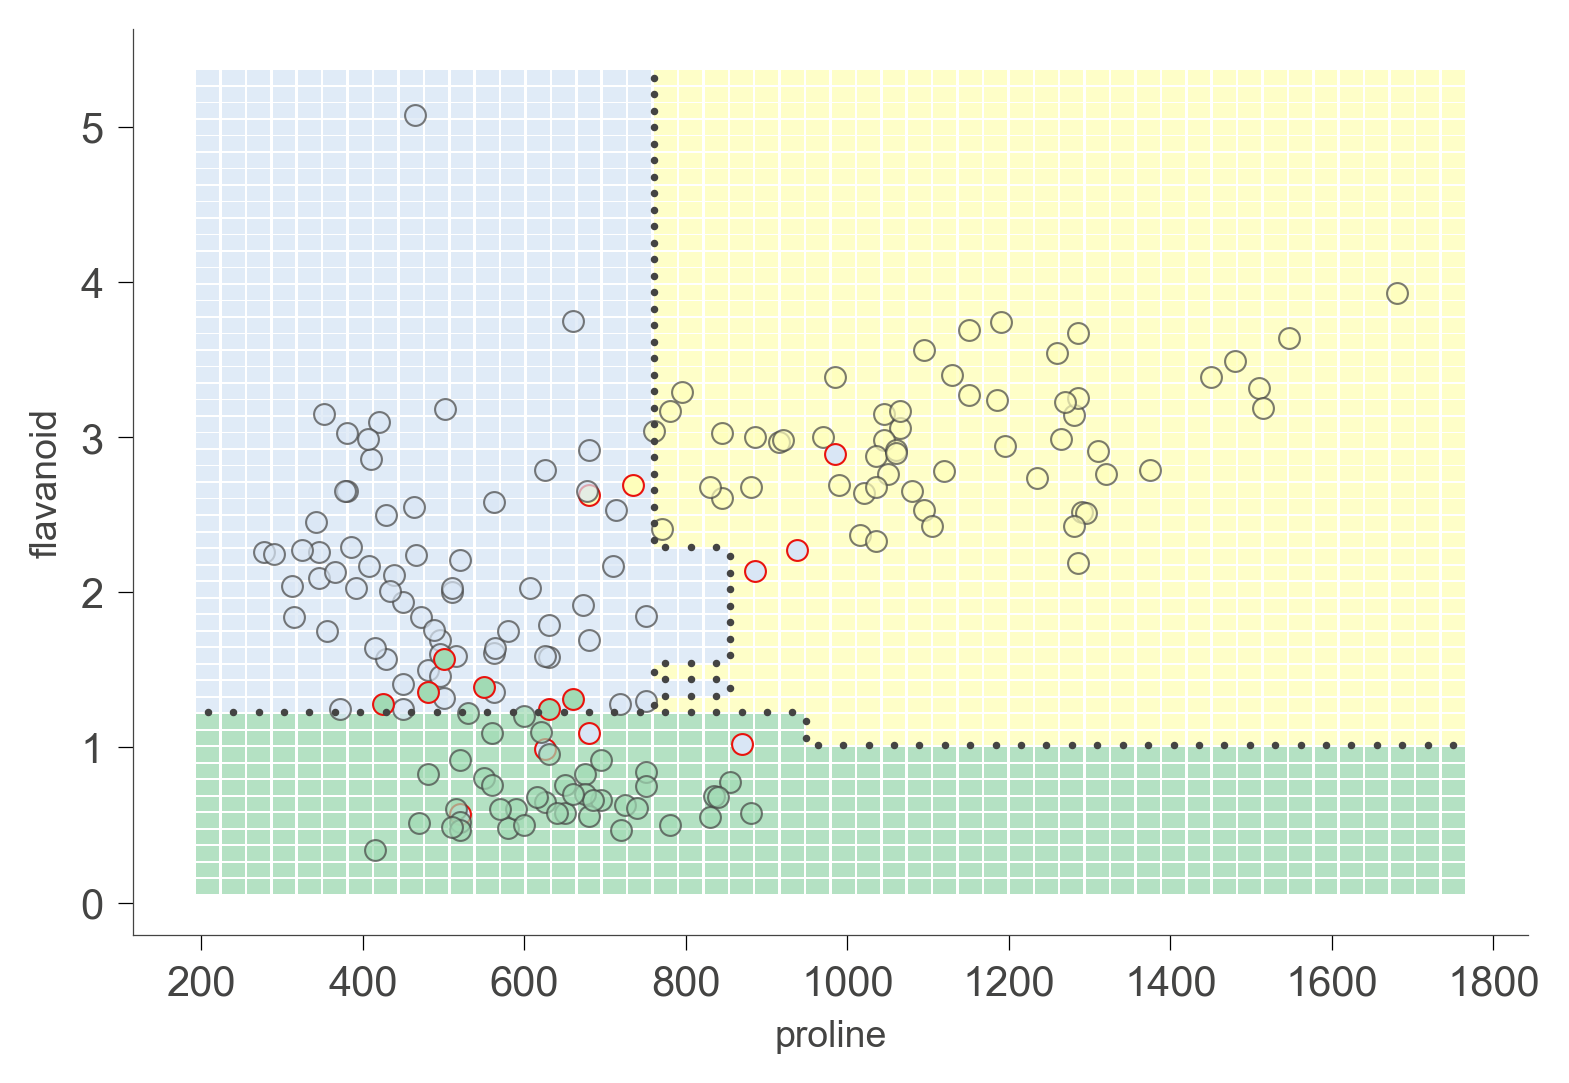

In [12]:
#### approach 1: using clfviz to visualize the boundary
#### if it's not working, try approach 2
# it did not work

fig,axes = plt.subplots(1,1,dpi=300)
decision_boundaries(rf, X, y, ax=axes,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid']);

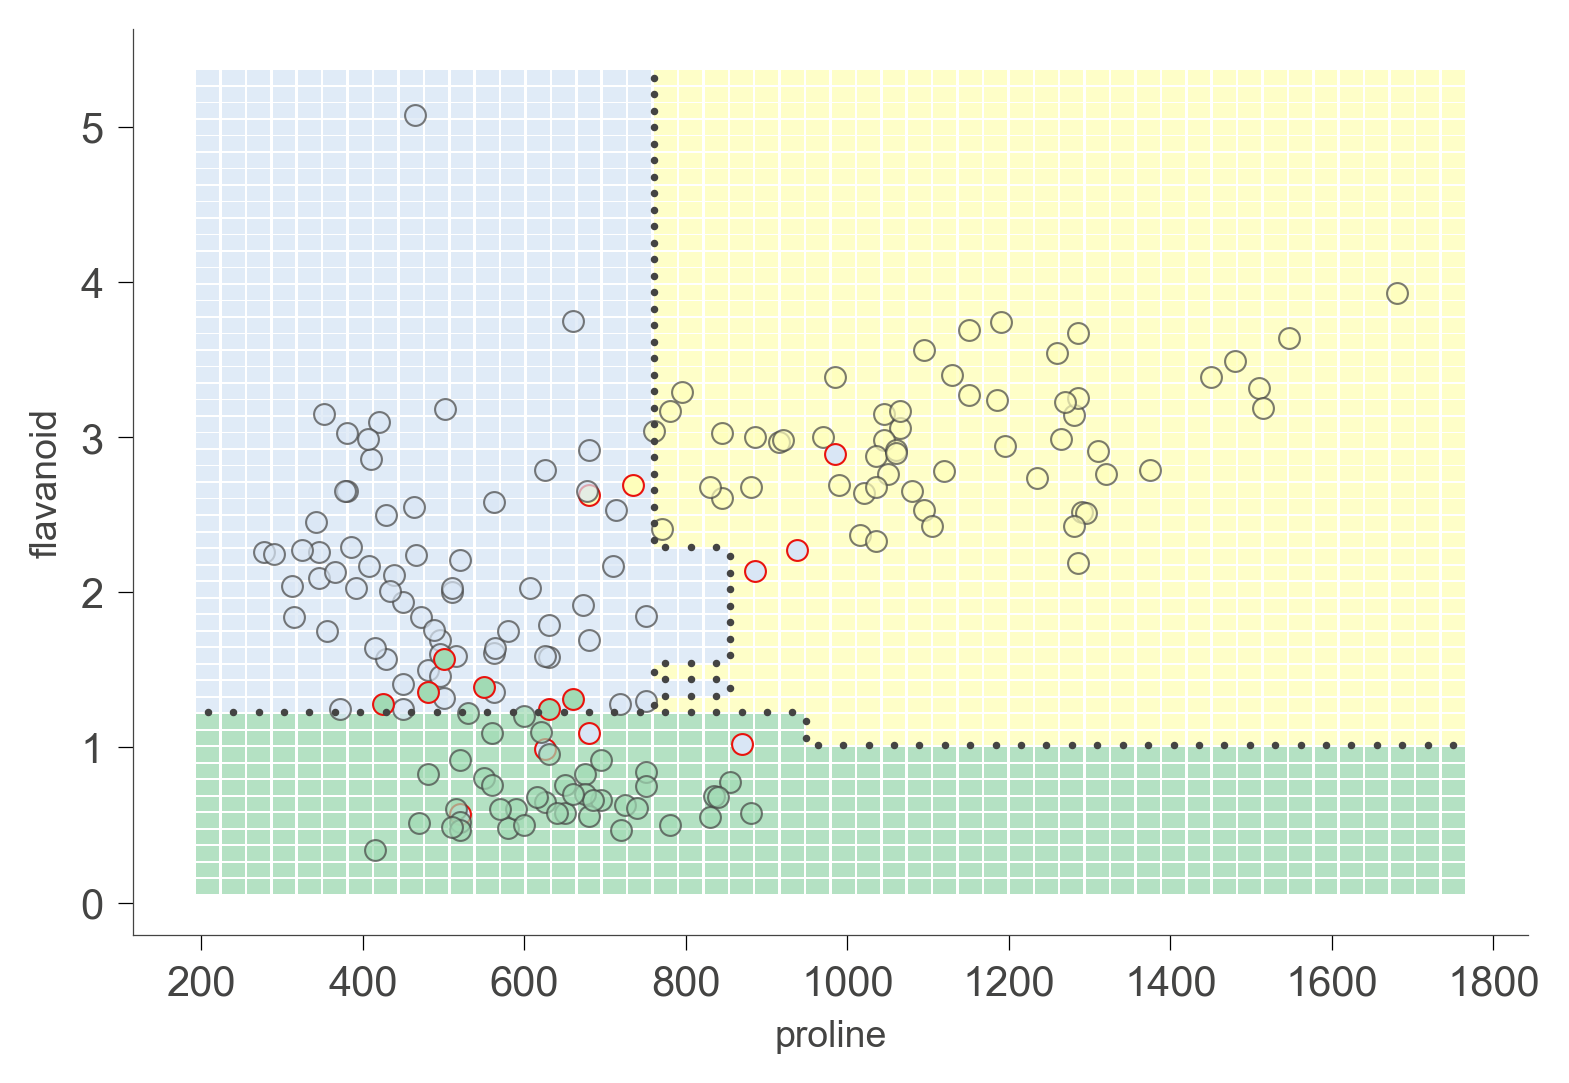

In [13]:
#### approach 2: 
fig,axes = plt.subplots(1,1,dpi=300)

decision_boundaries(rf, X, y, ax=axes,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid'])

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Below, regenerate the above analysis for different values of:

- `min_samples_leaf`
- `max_depth`
- `n_estimators`

Investigate their effect on the decision boundary!
    
</div>

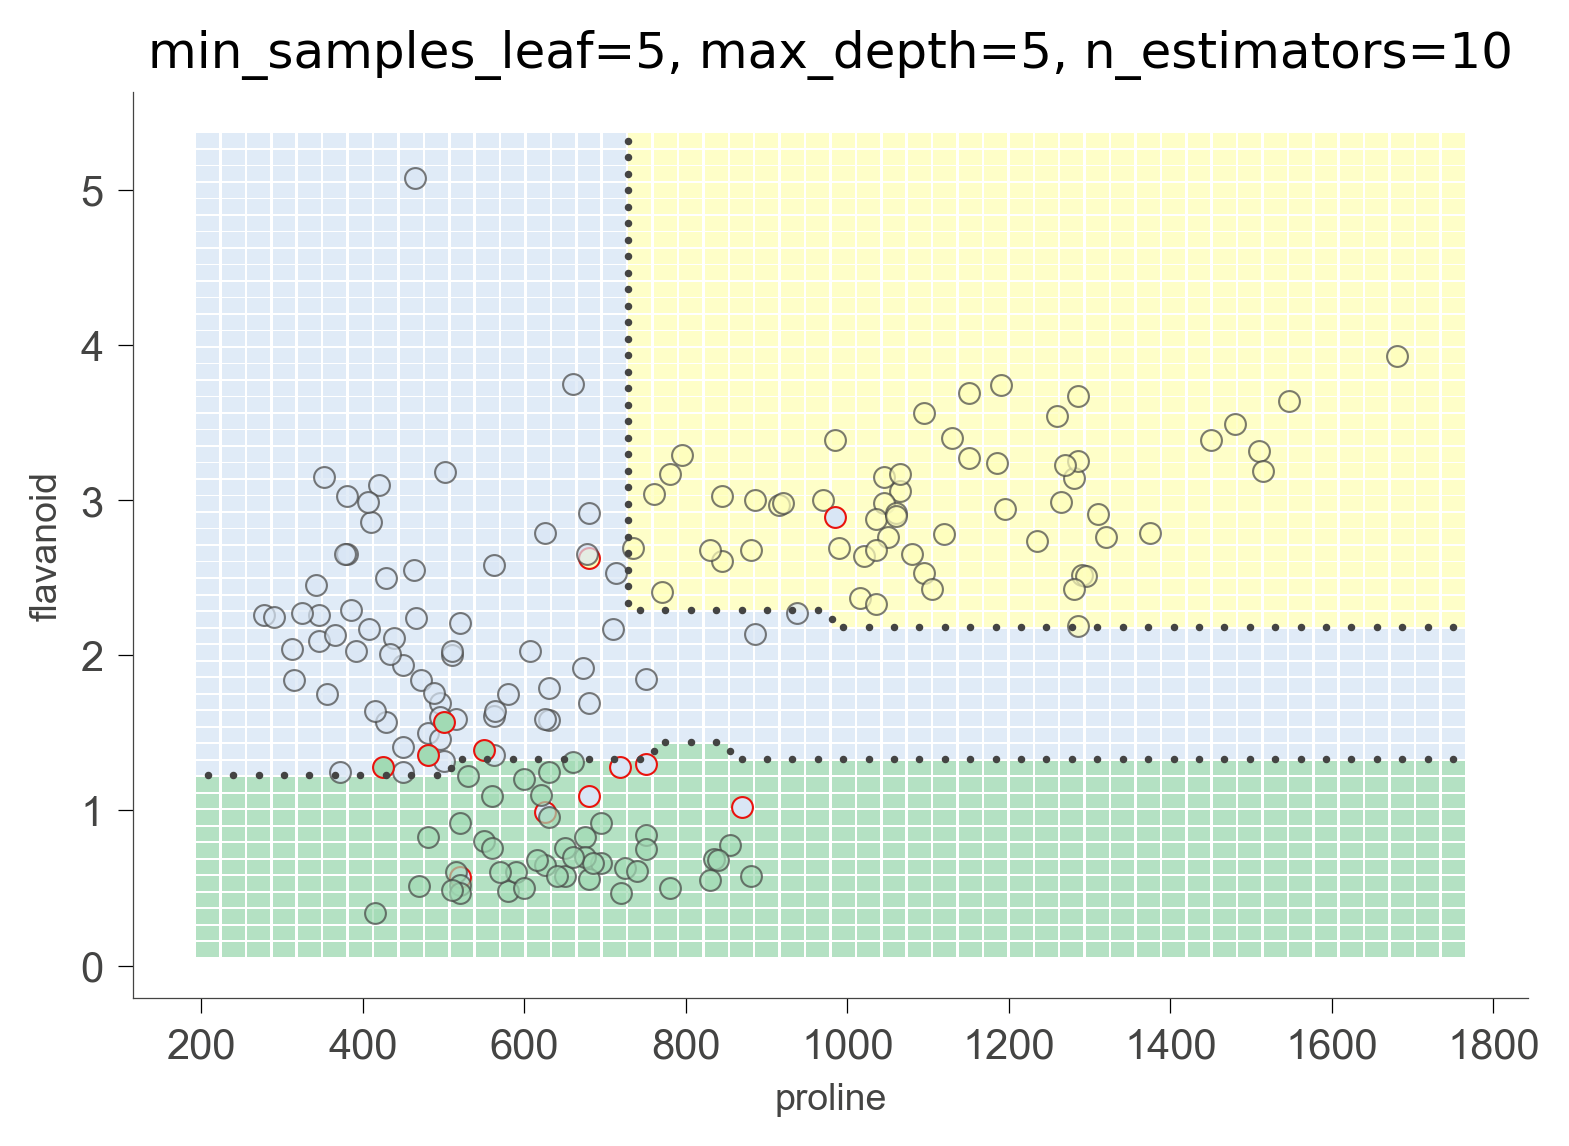

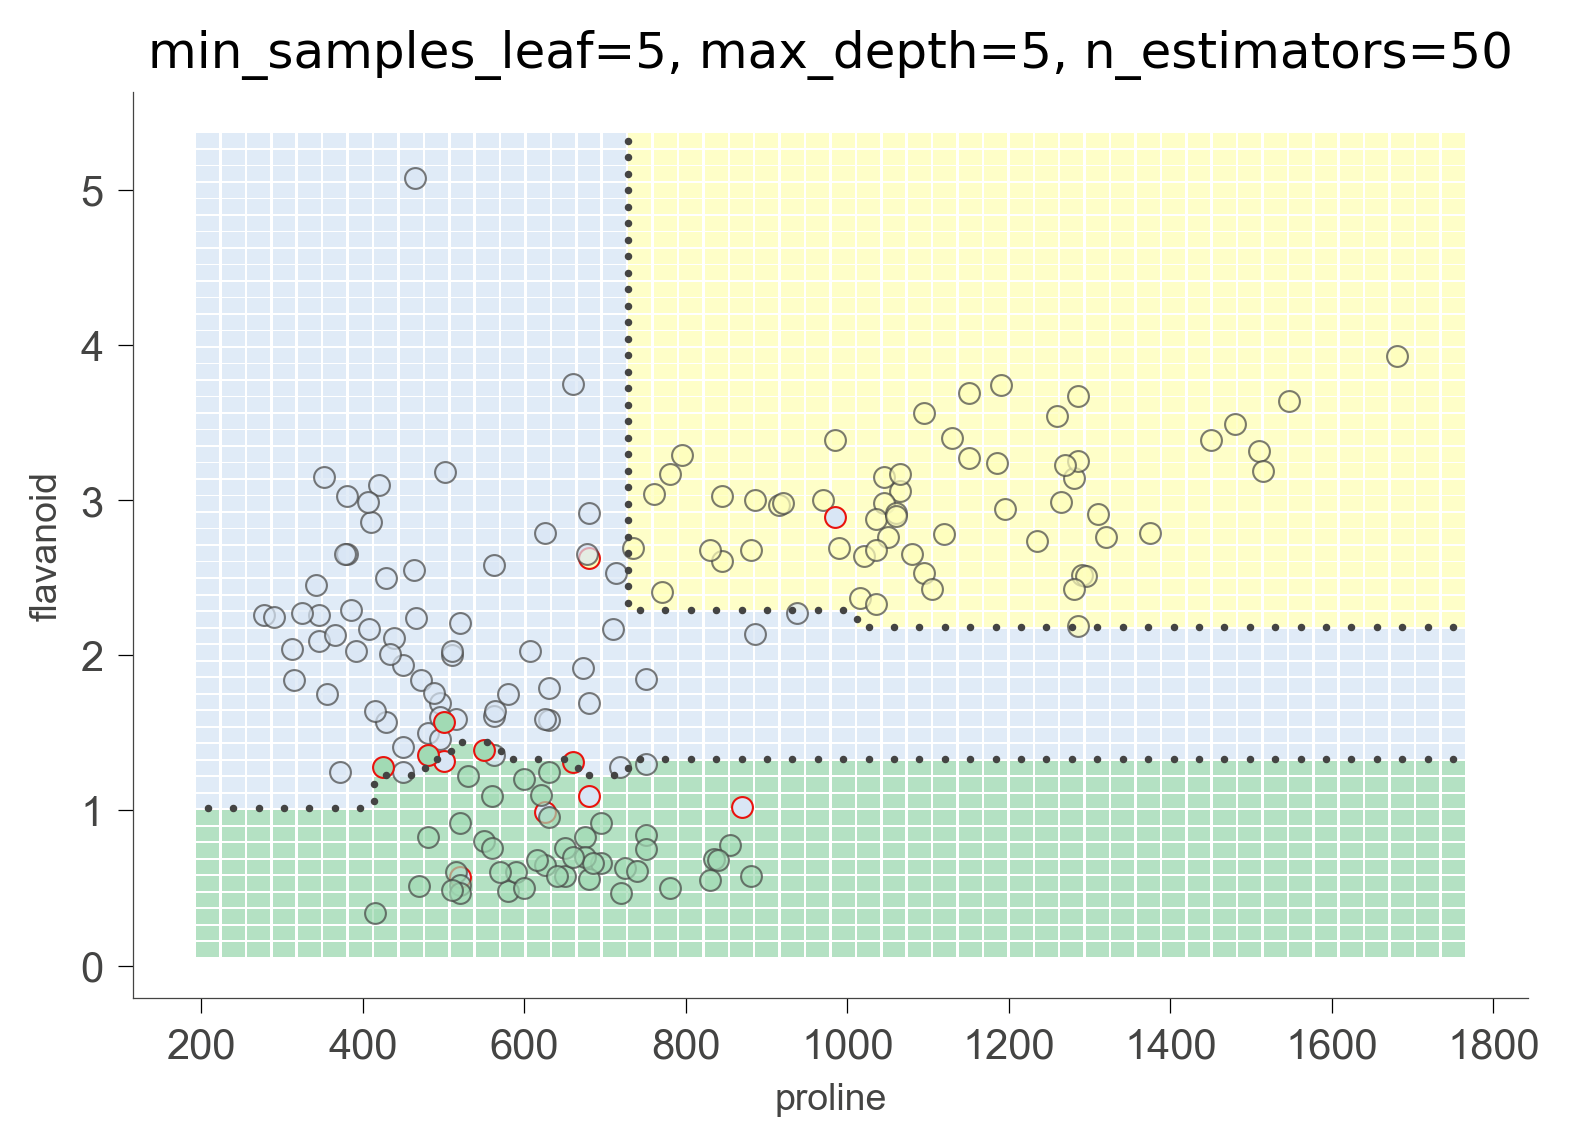

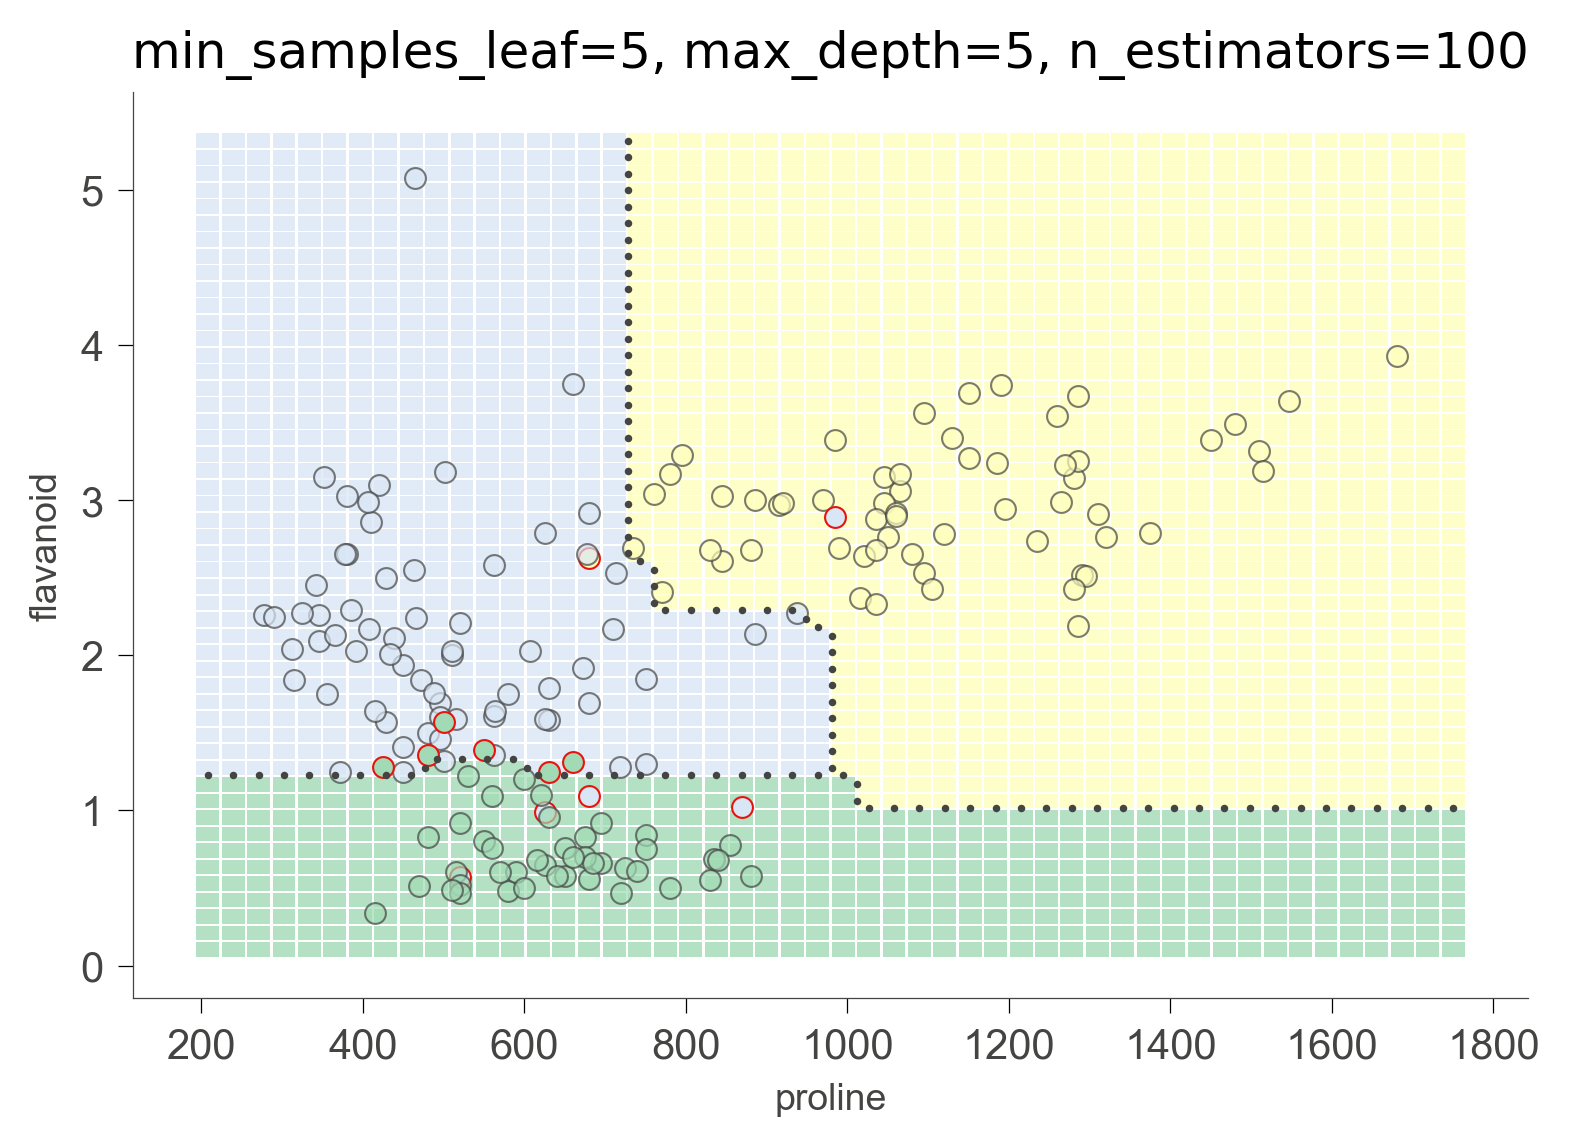

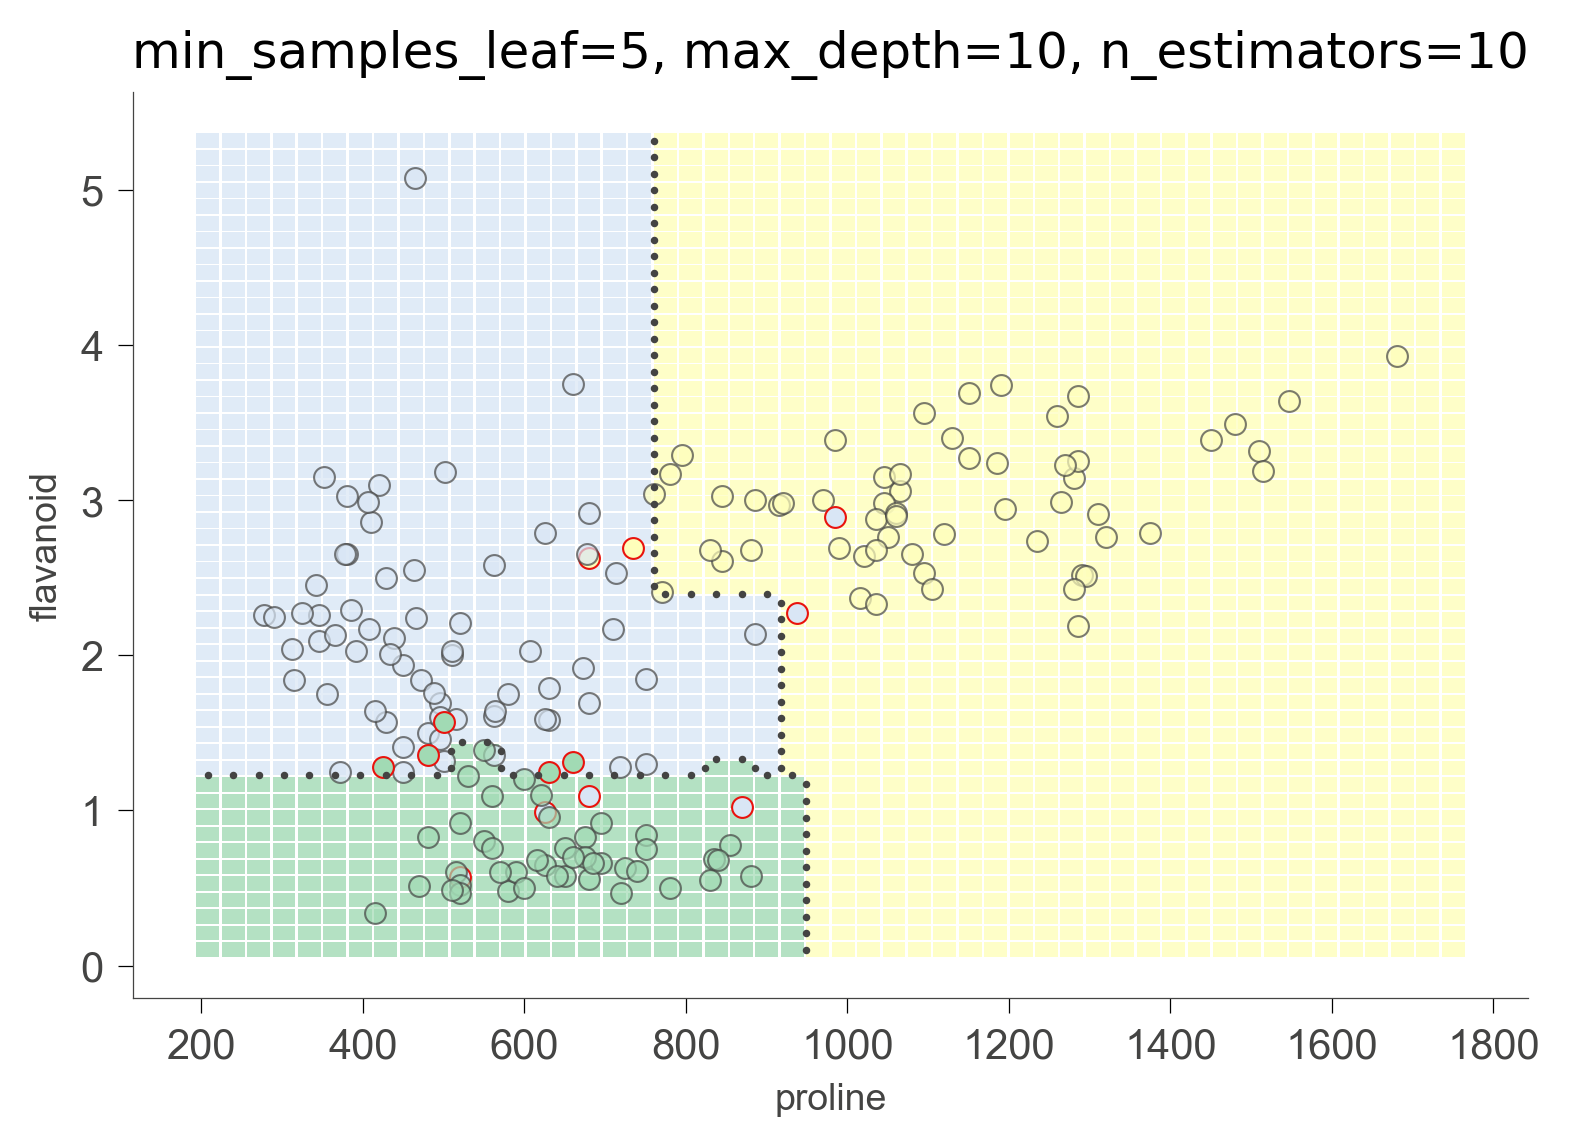

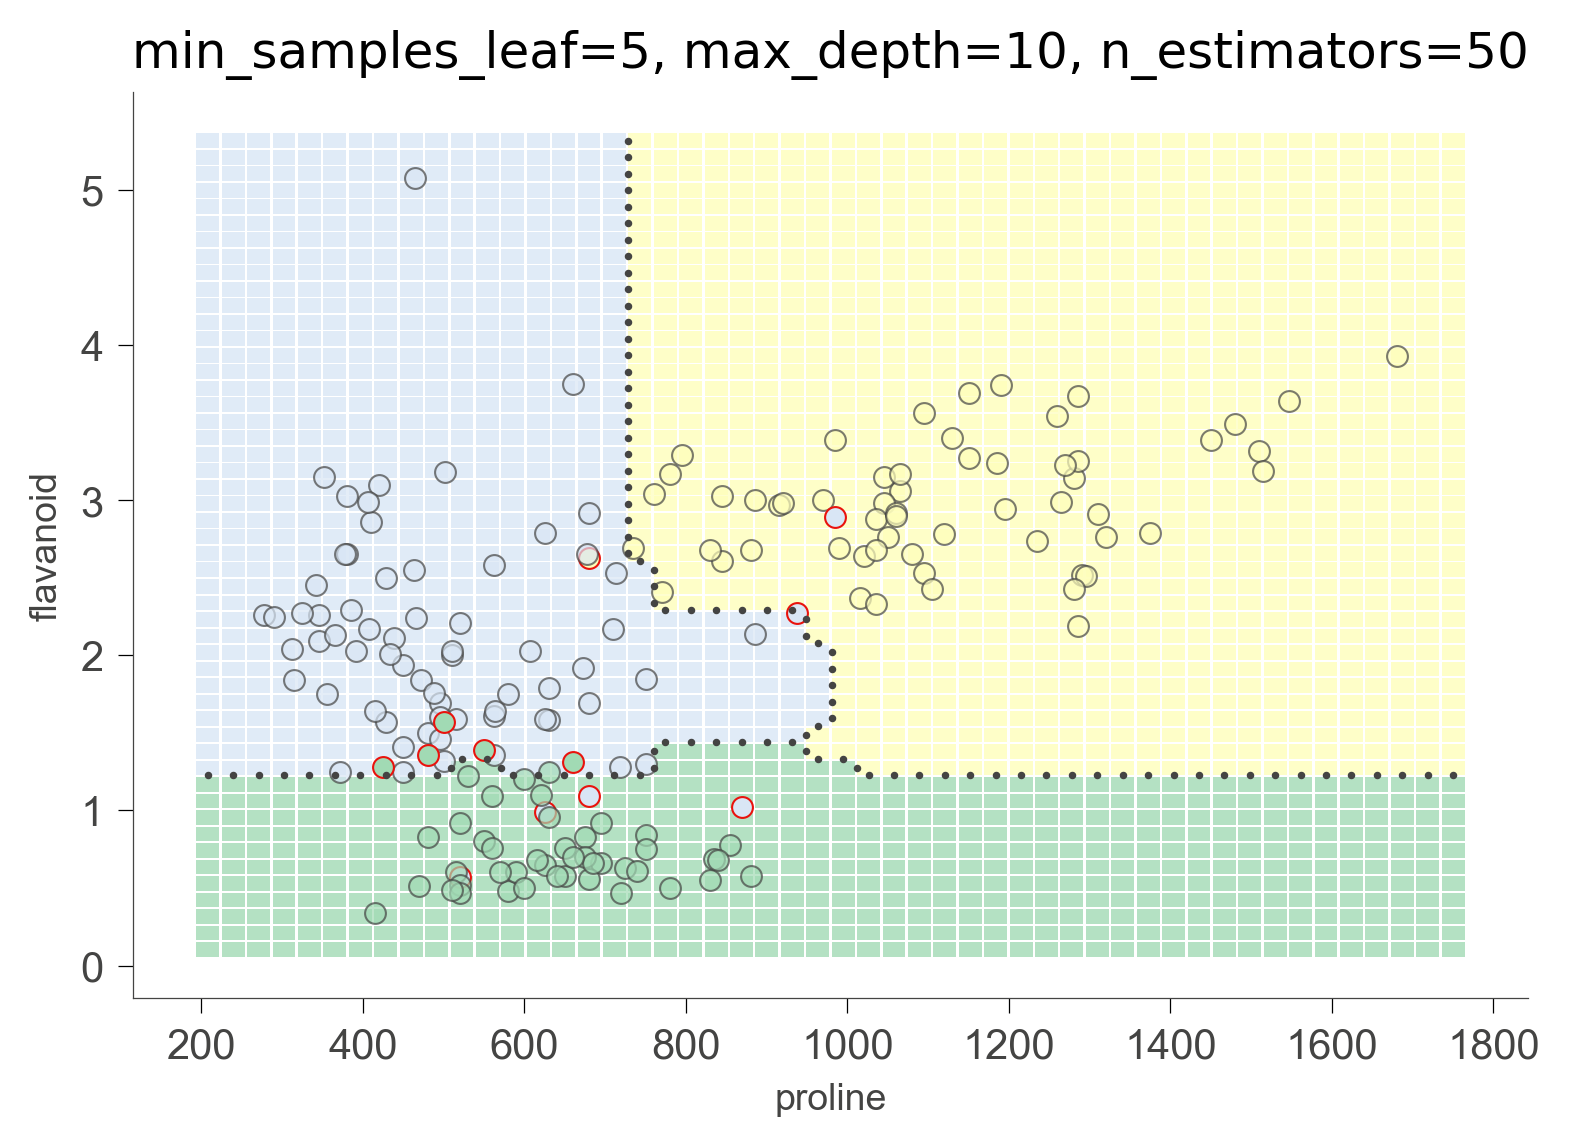

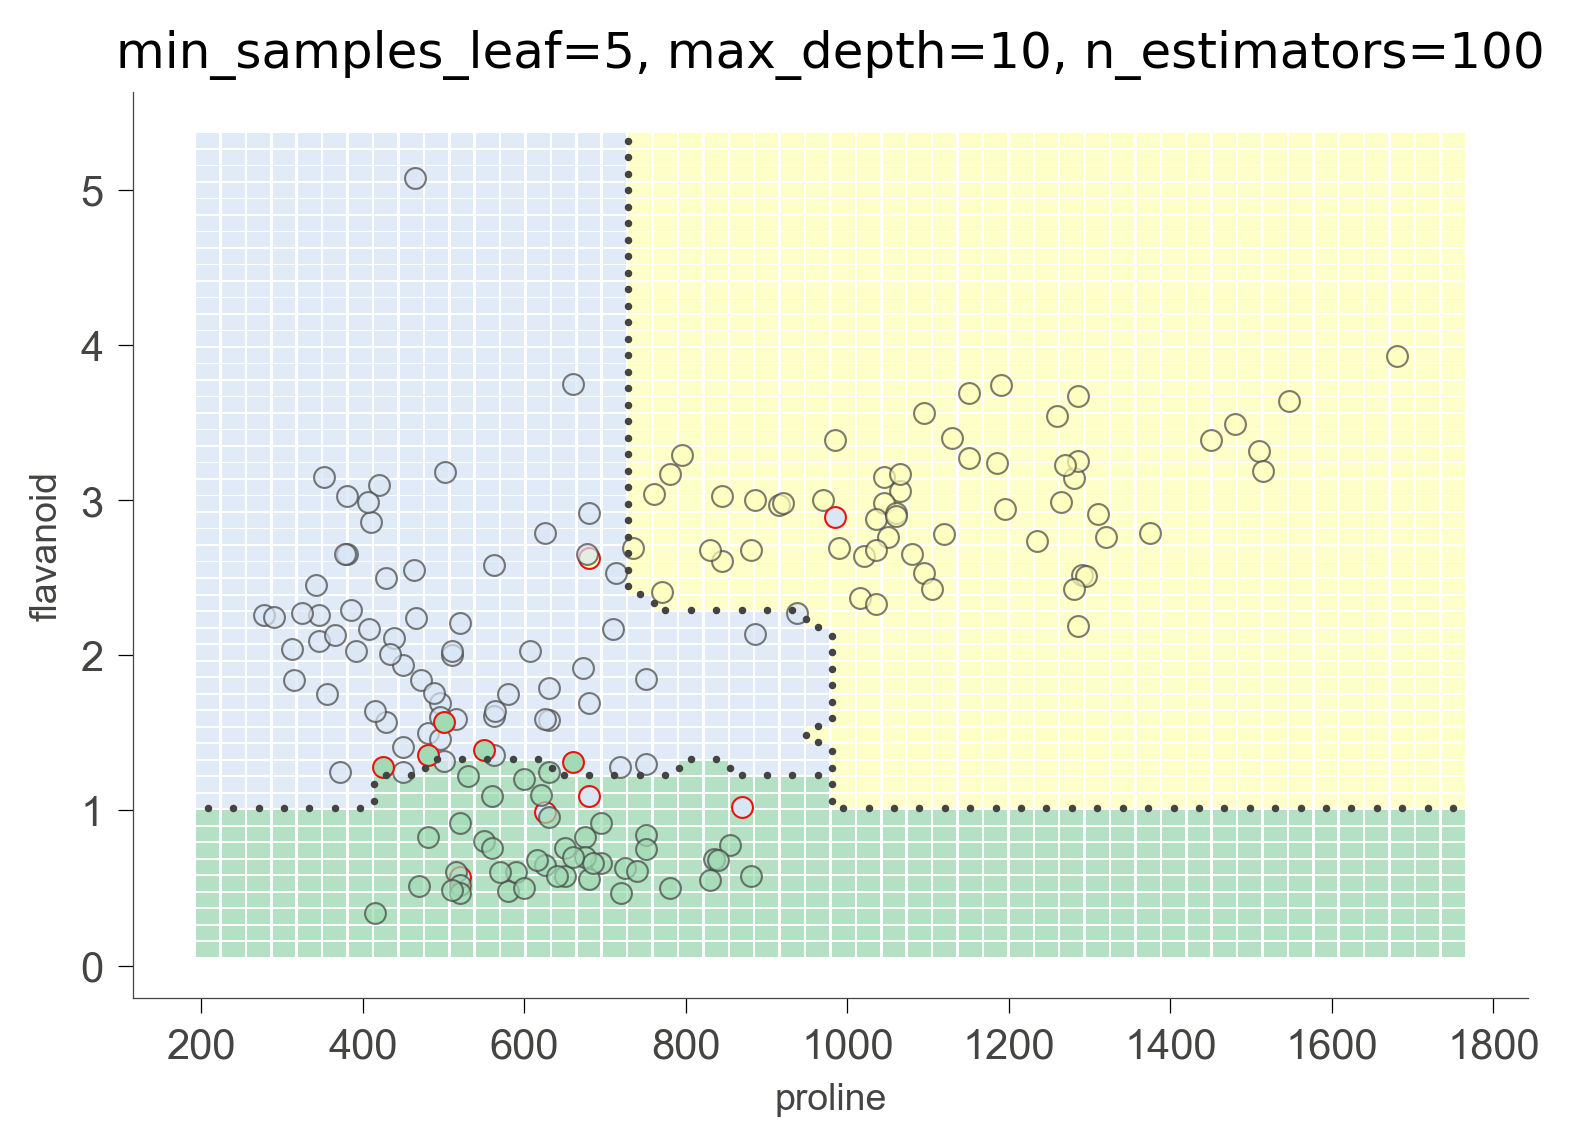

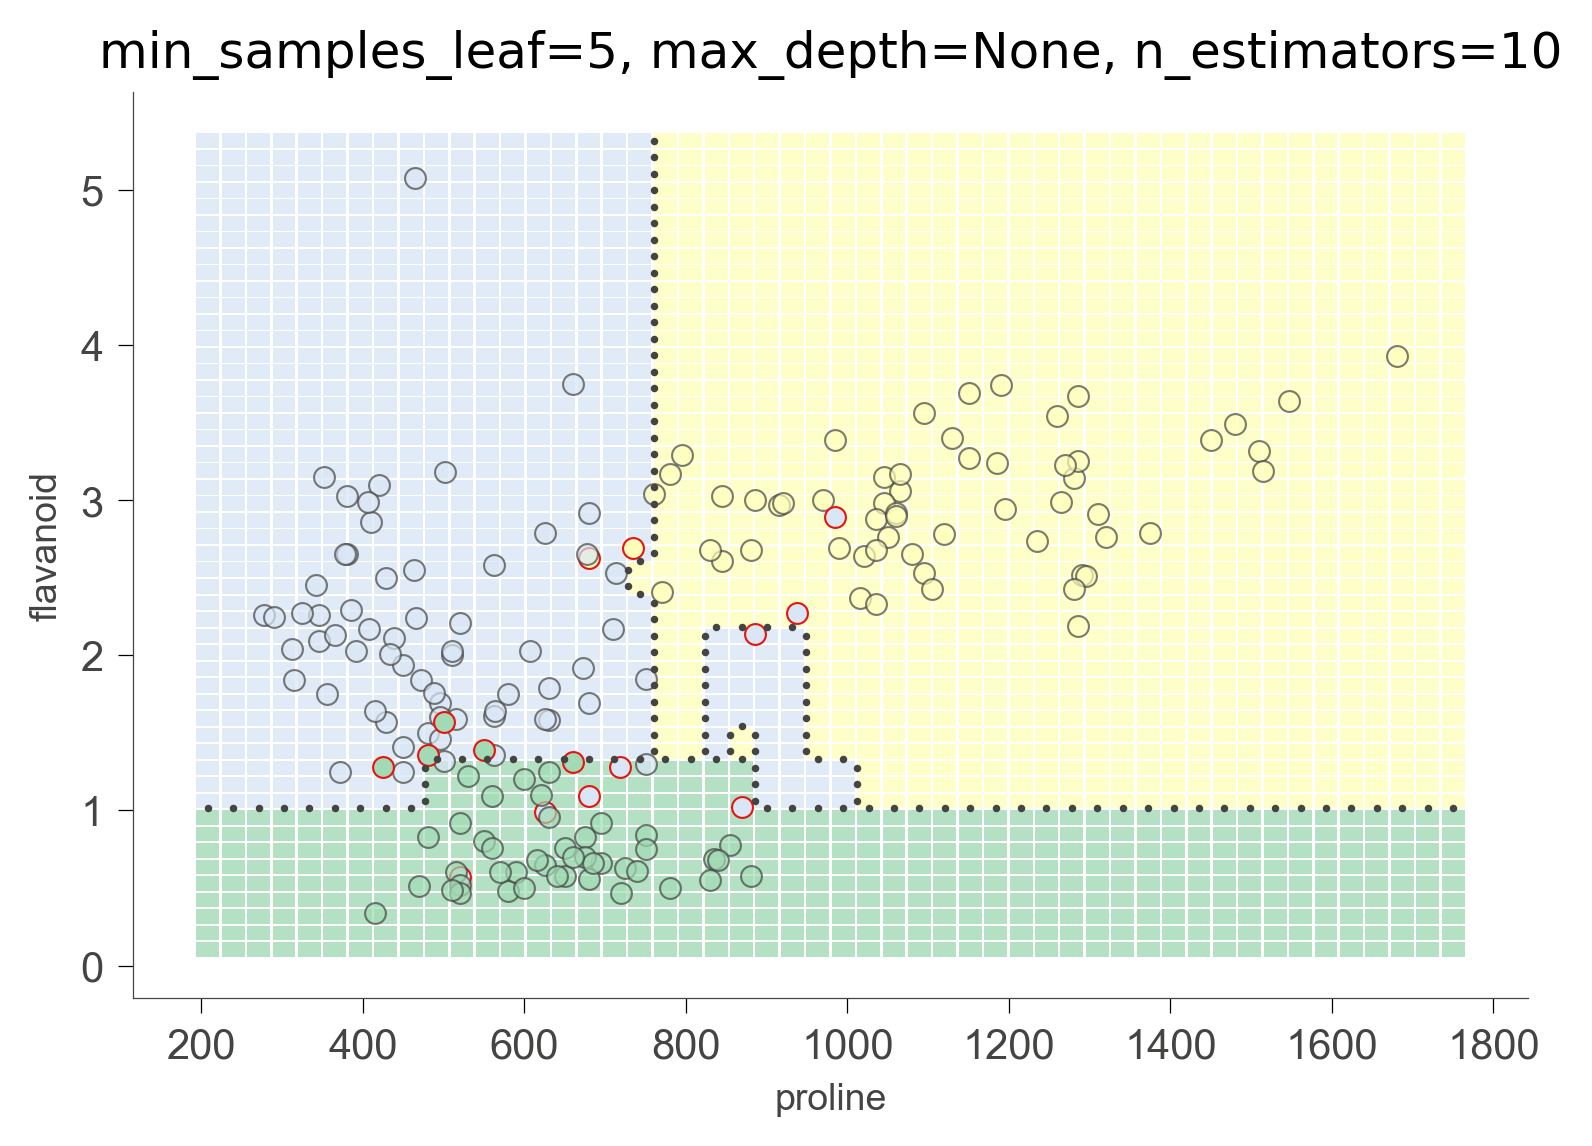

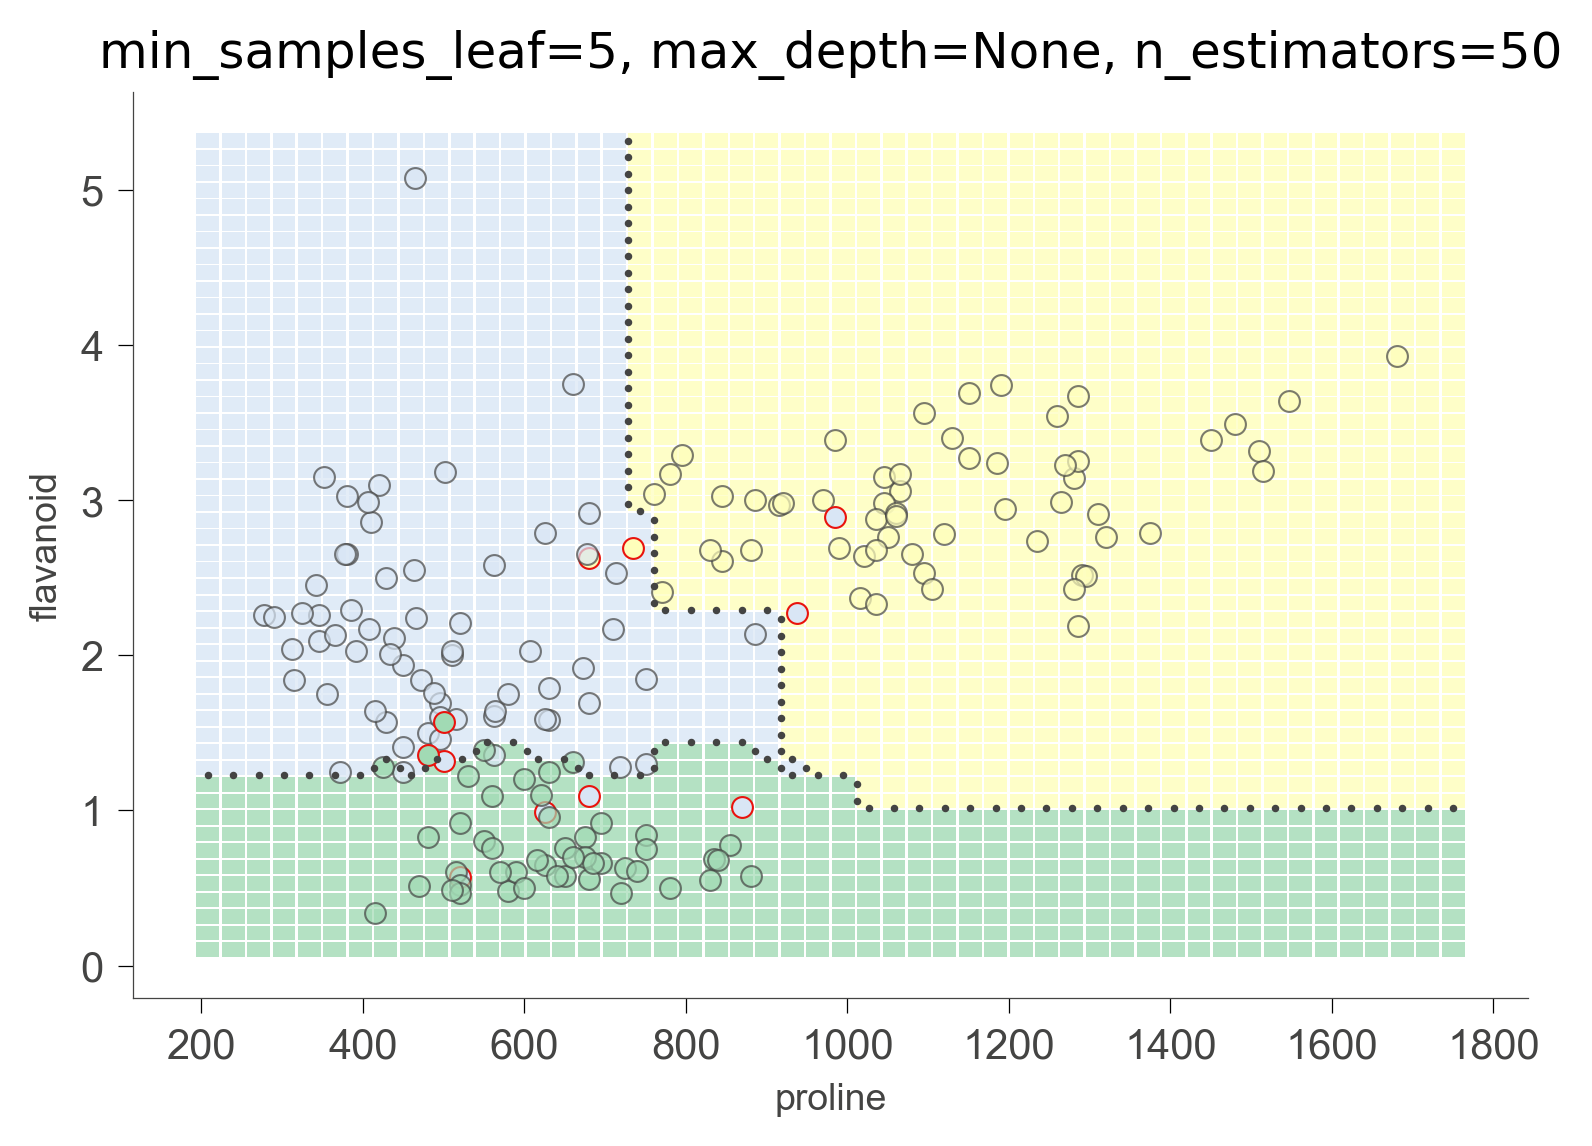

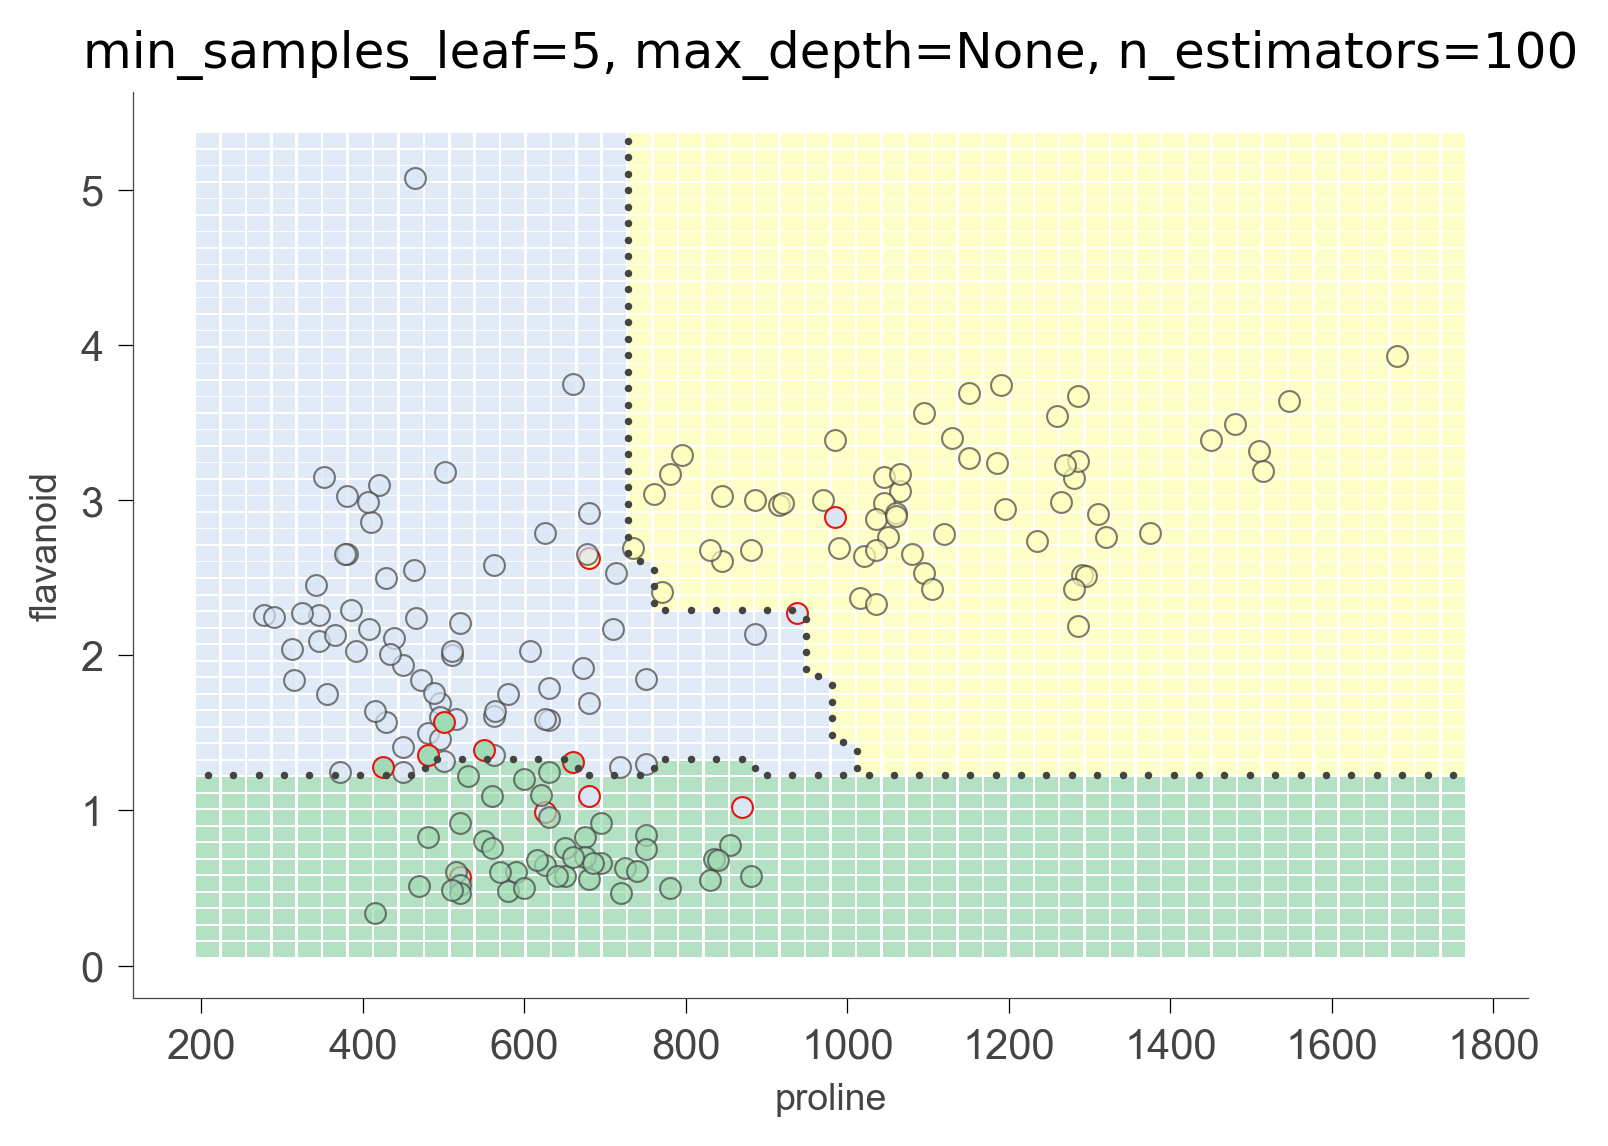

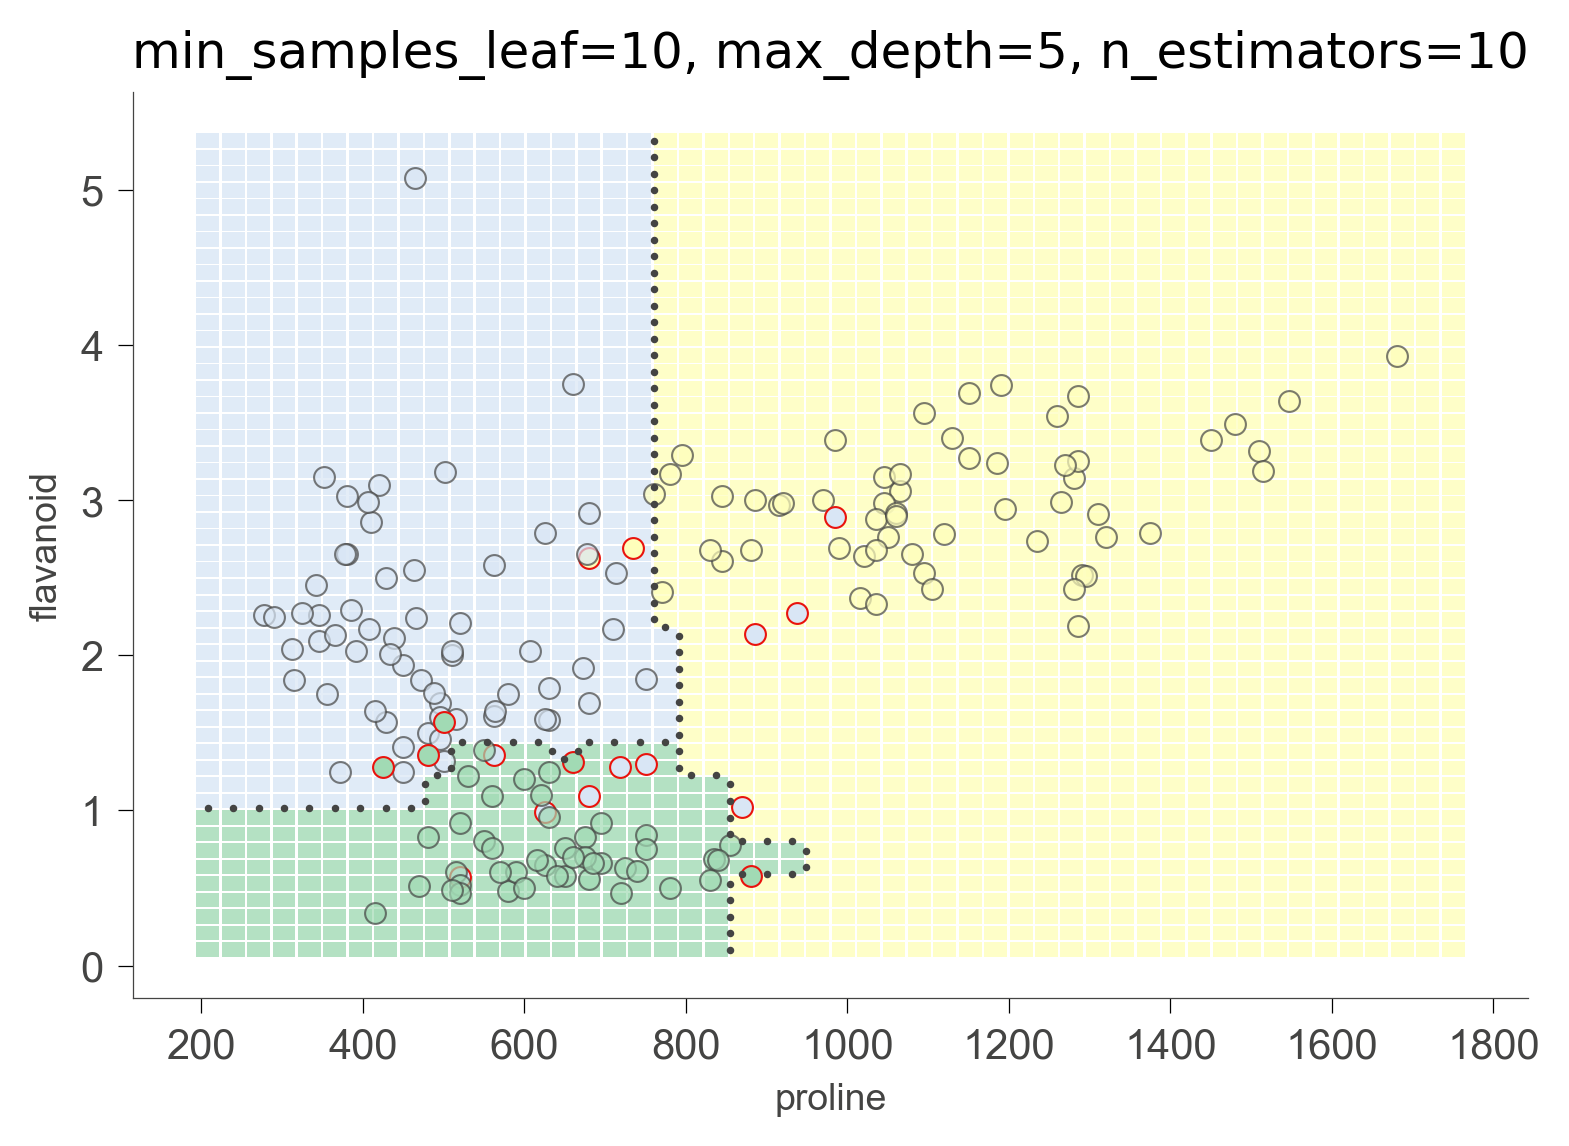

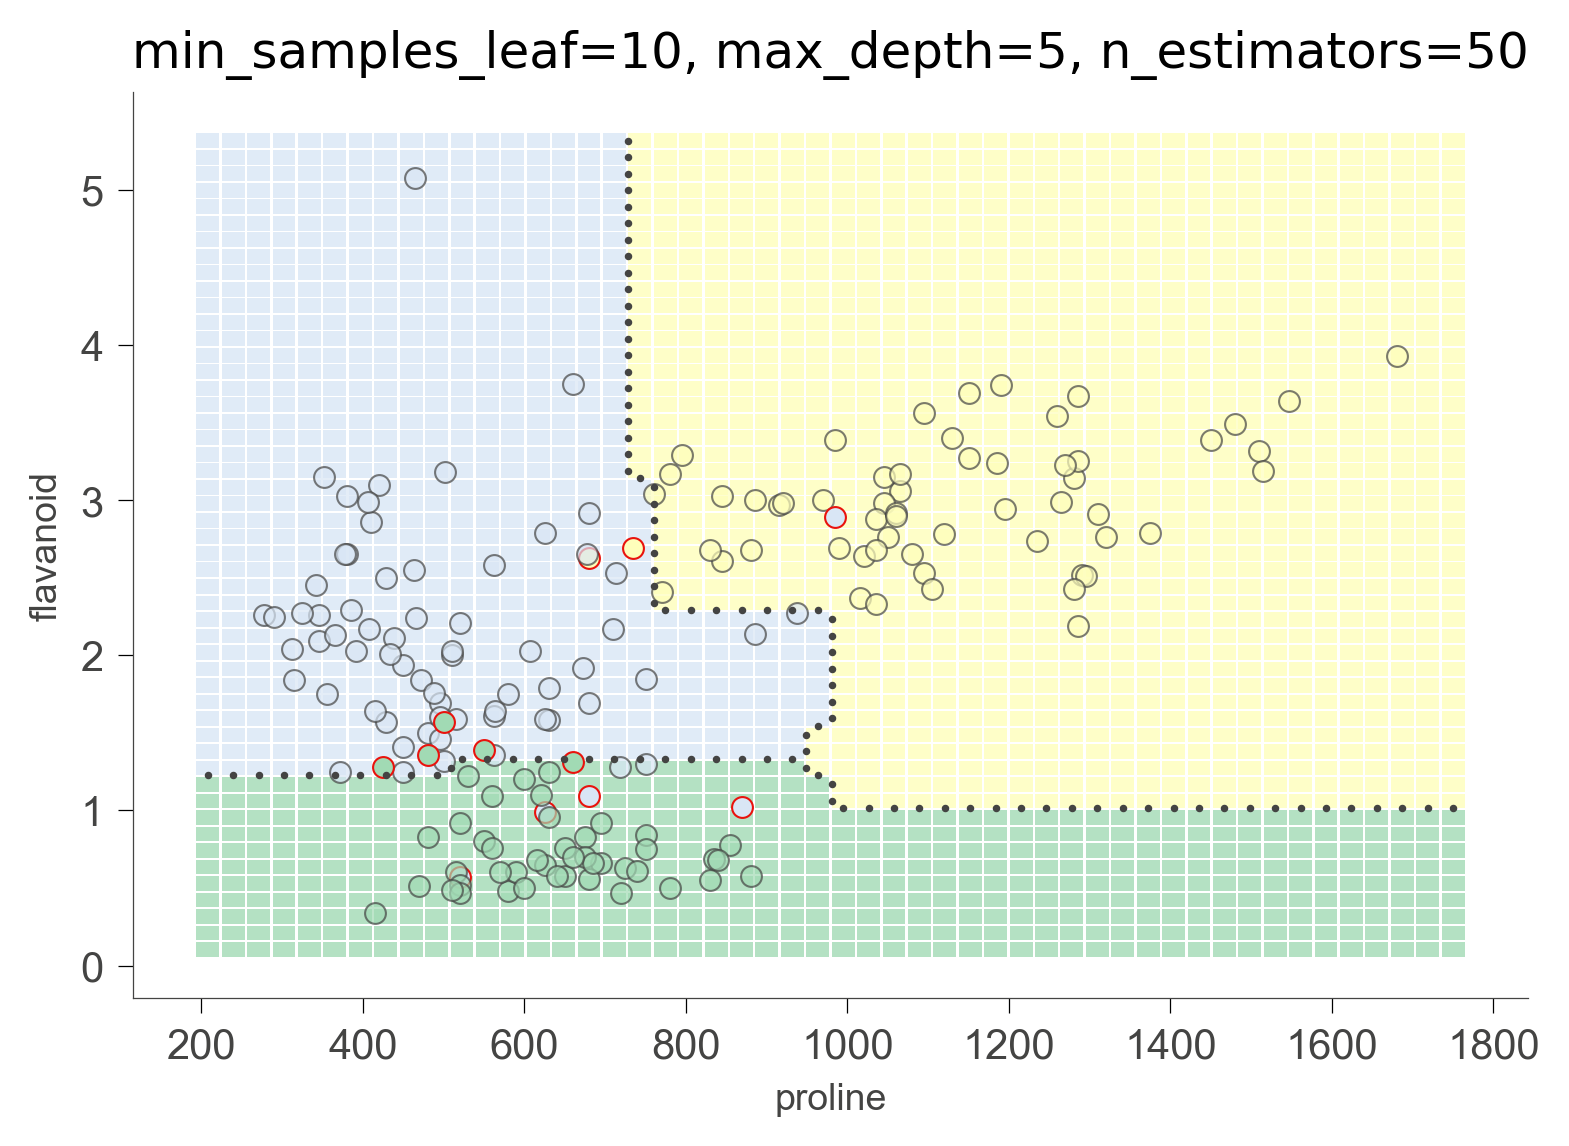

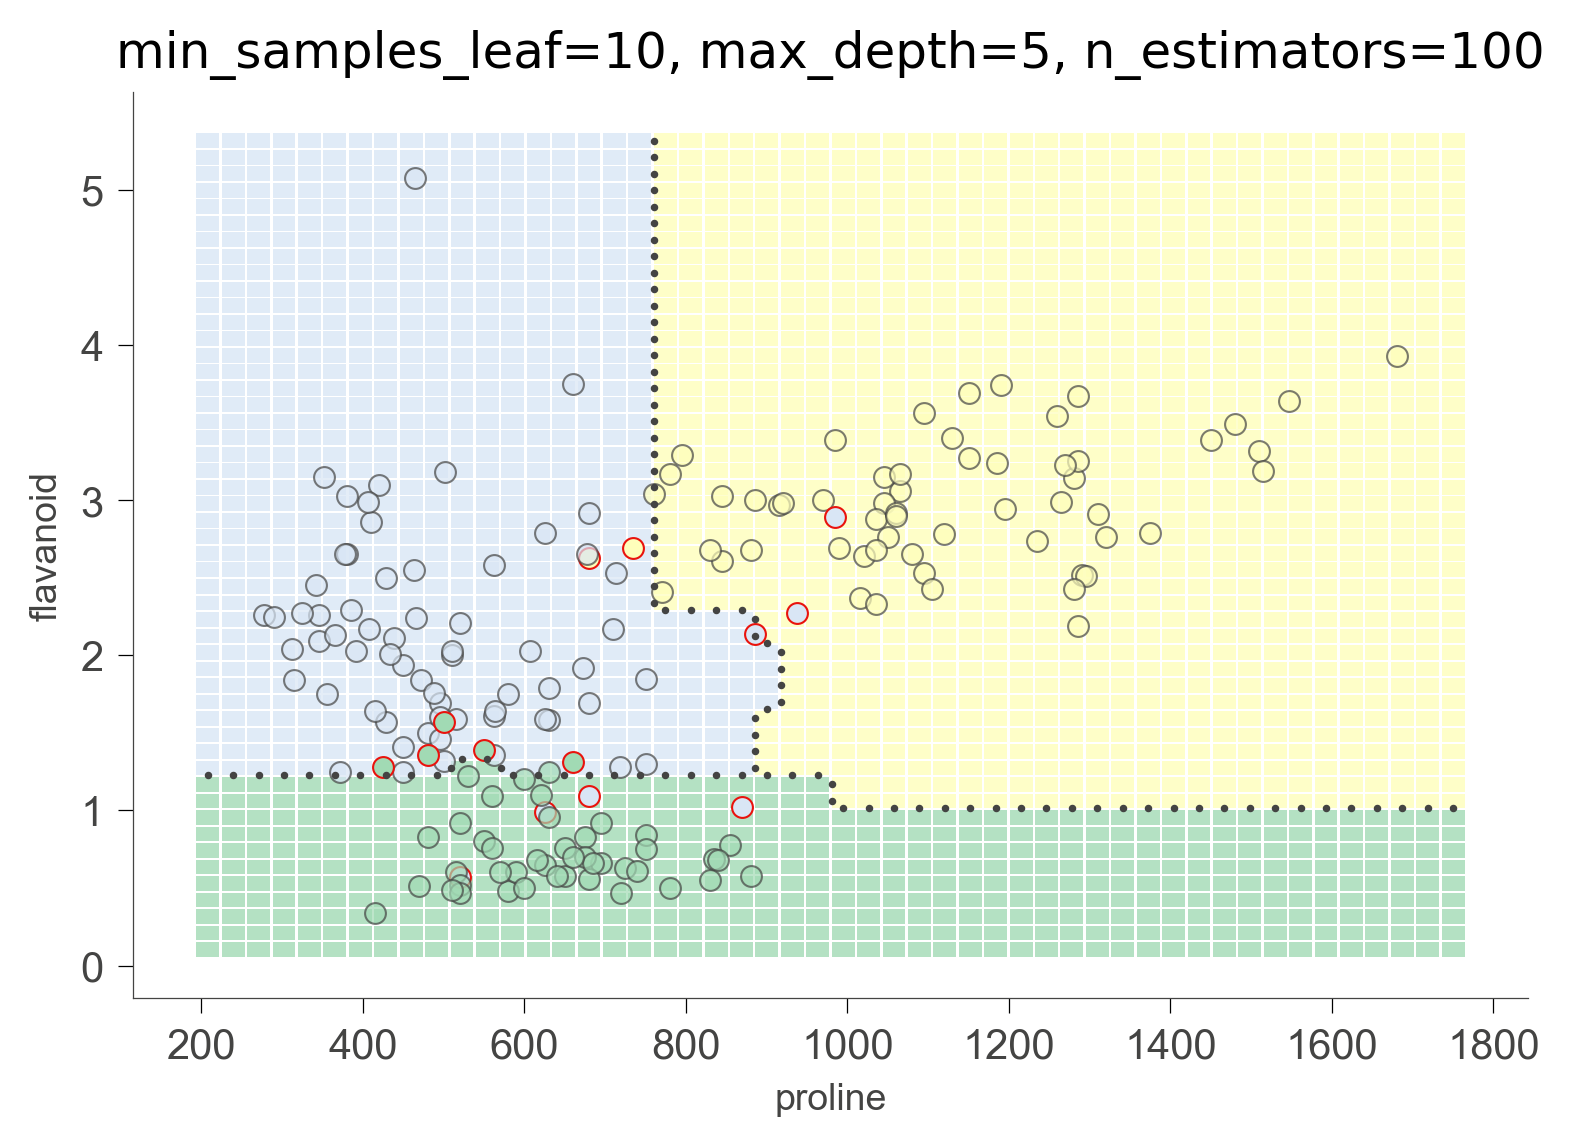

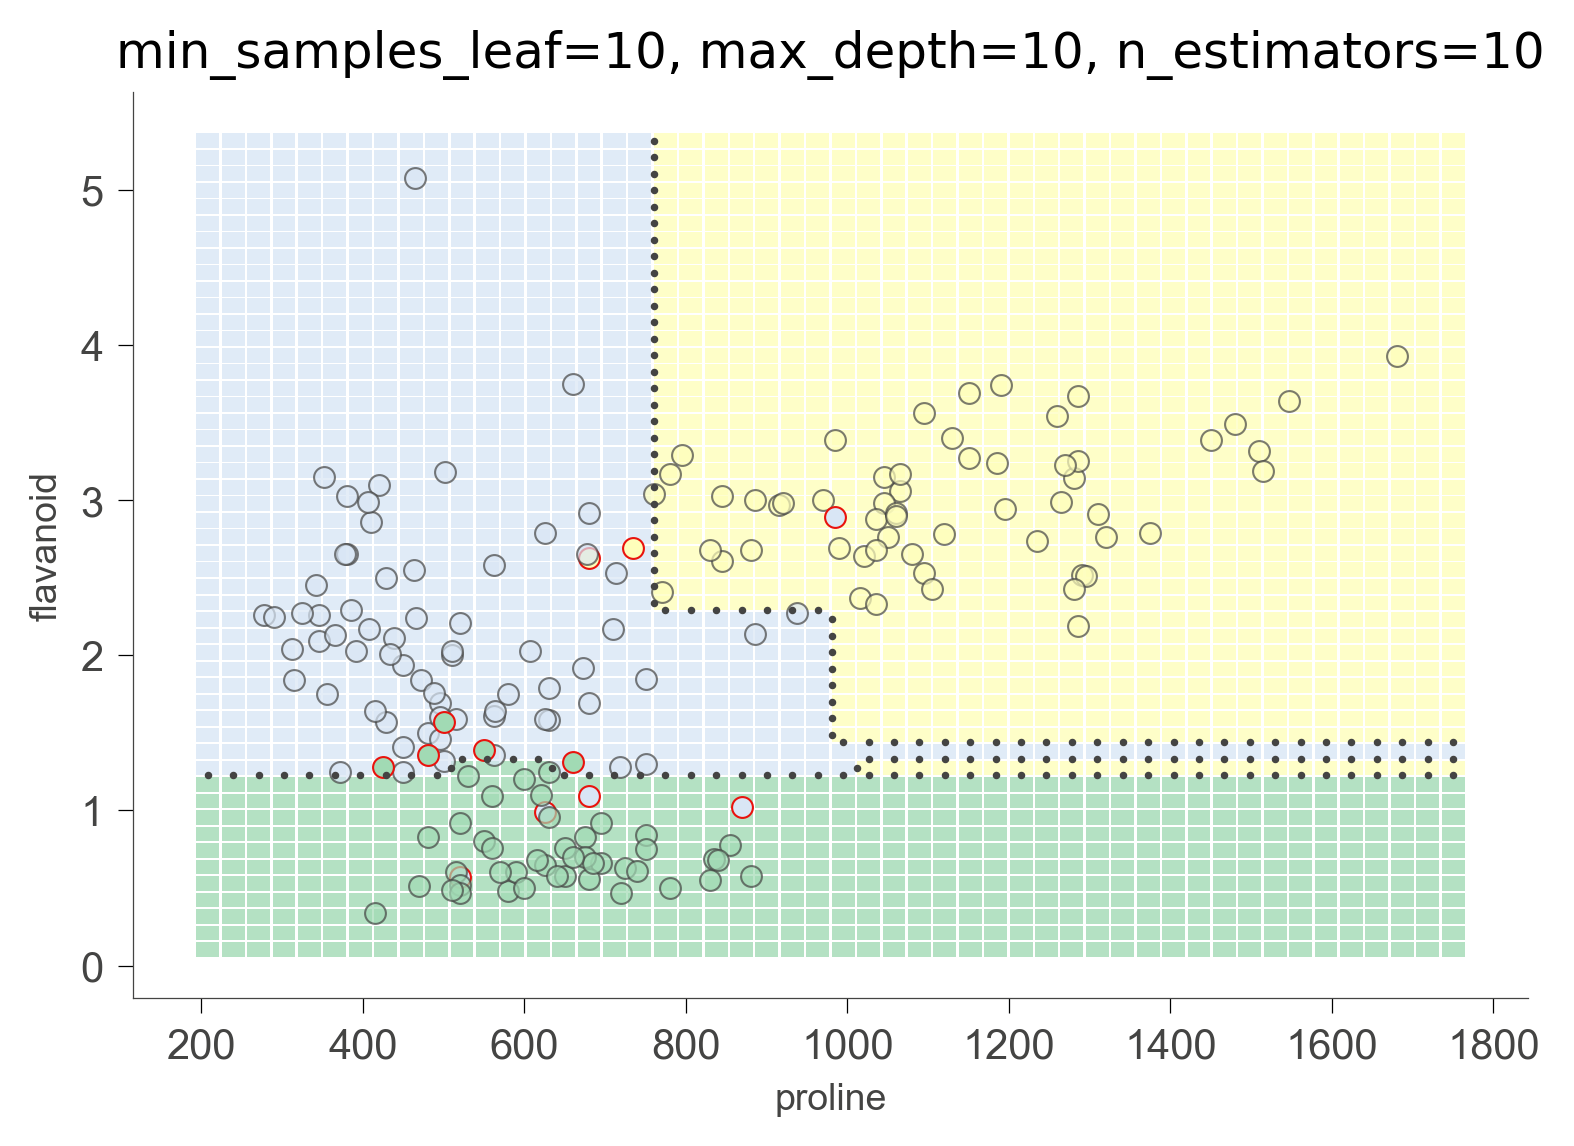

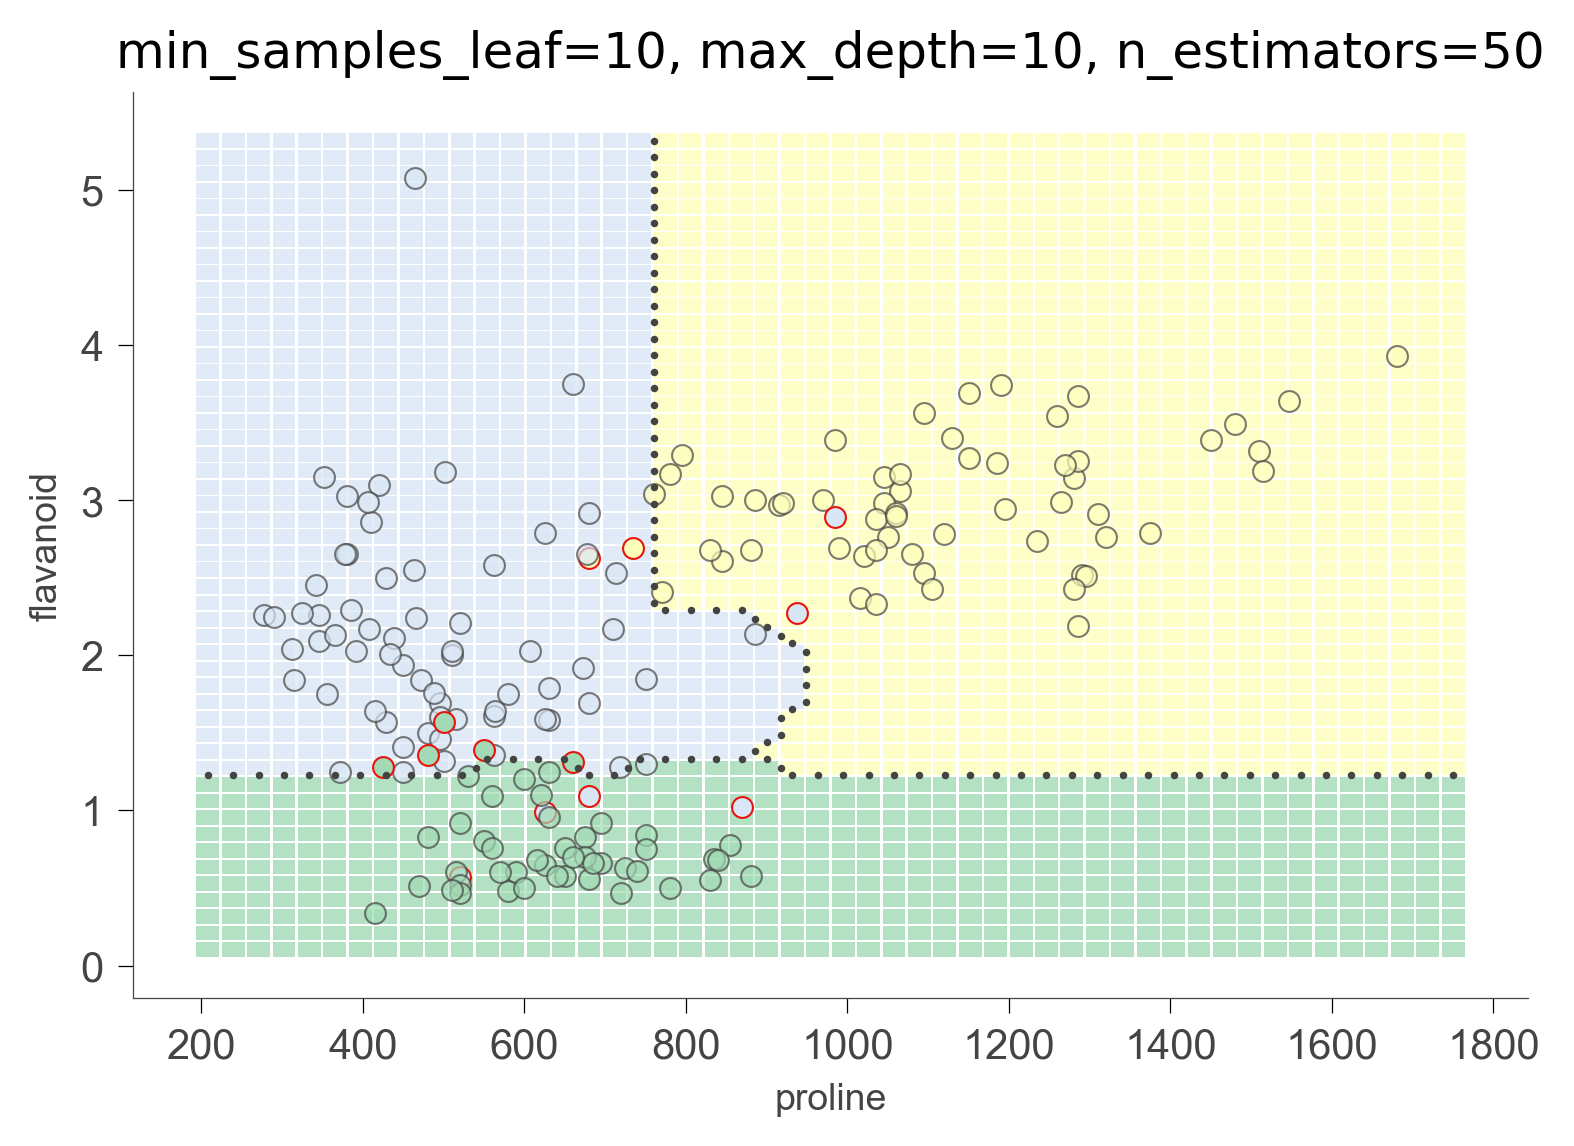

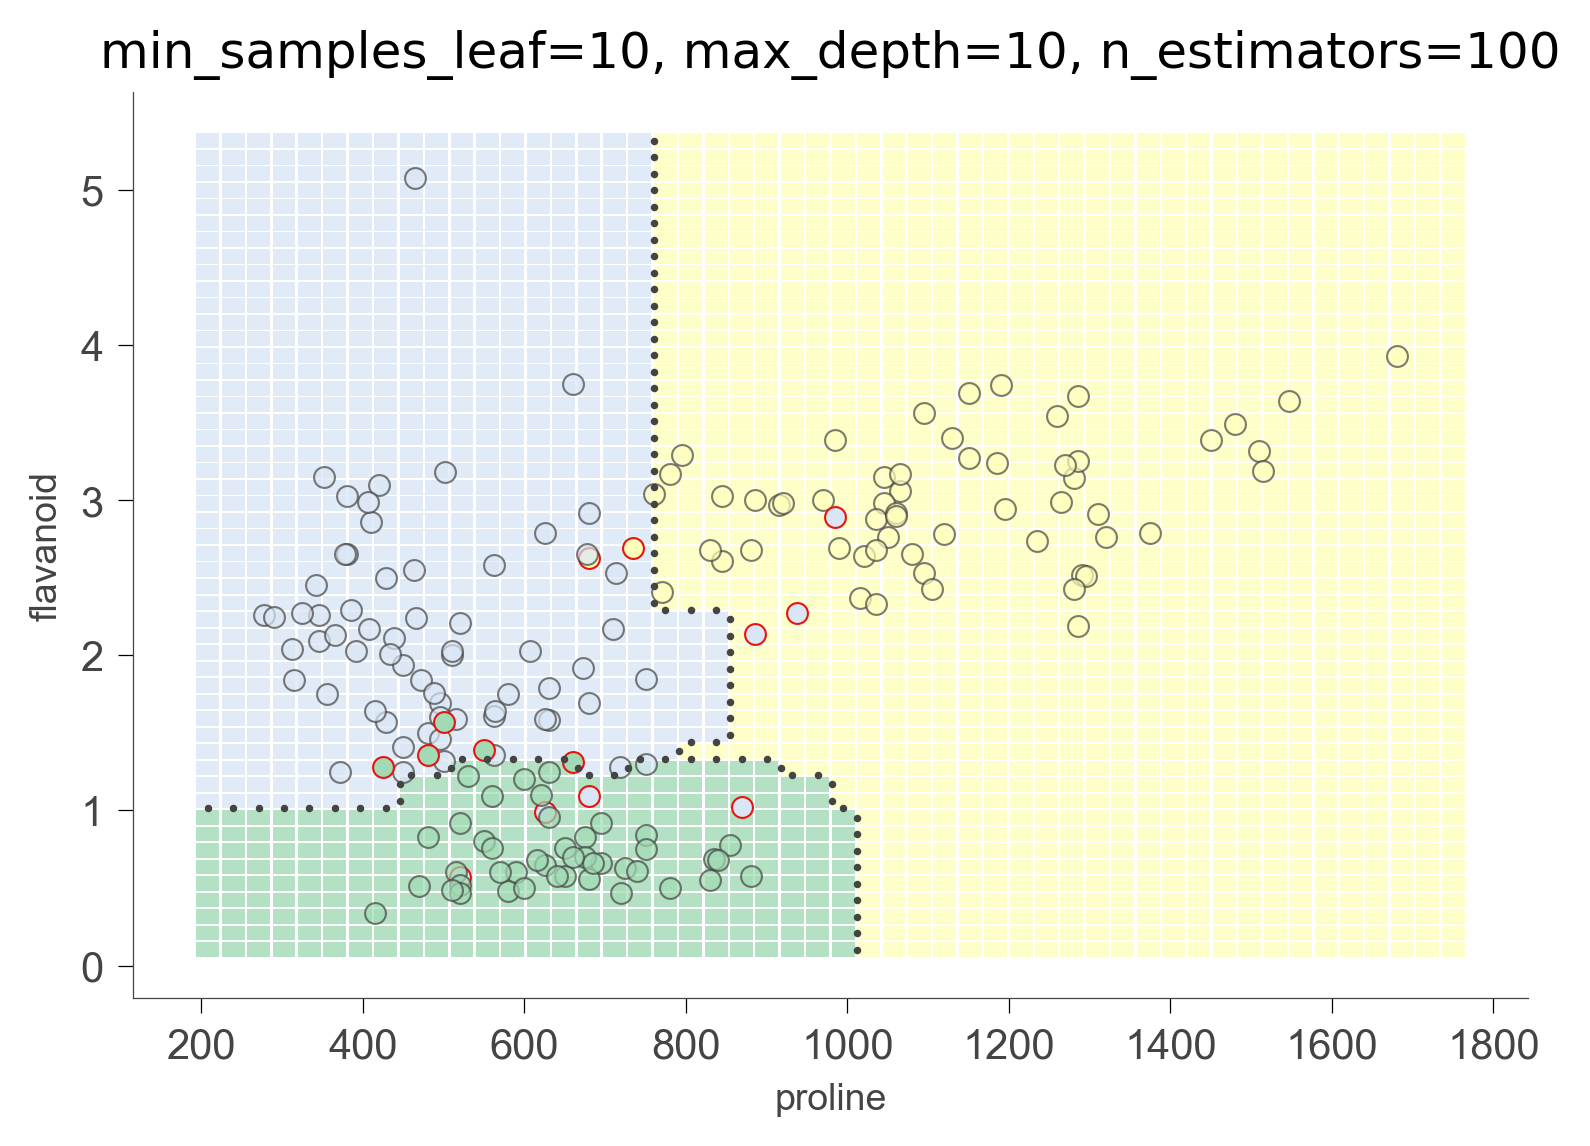

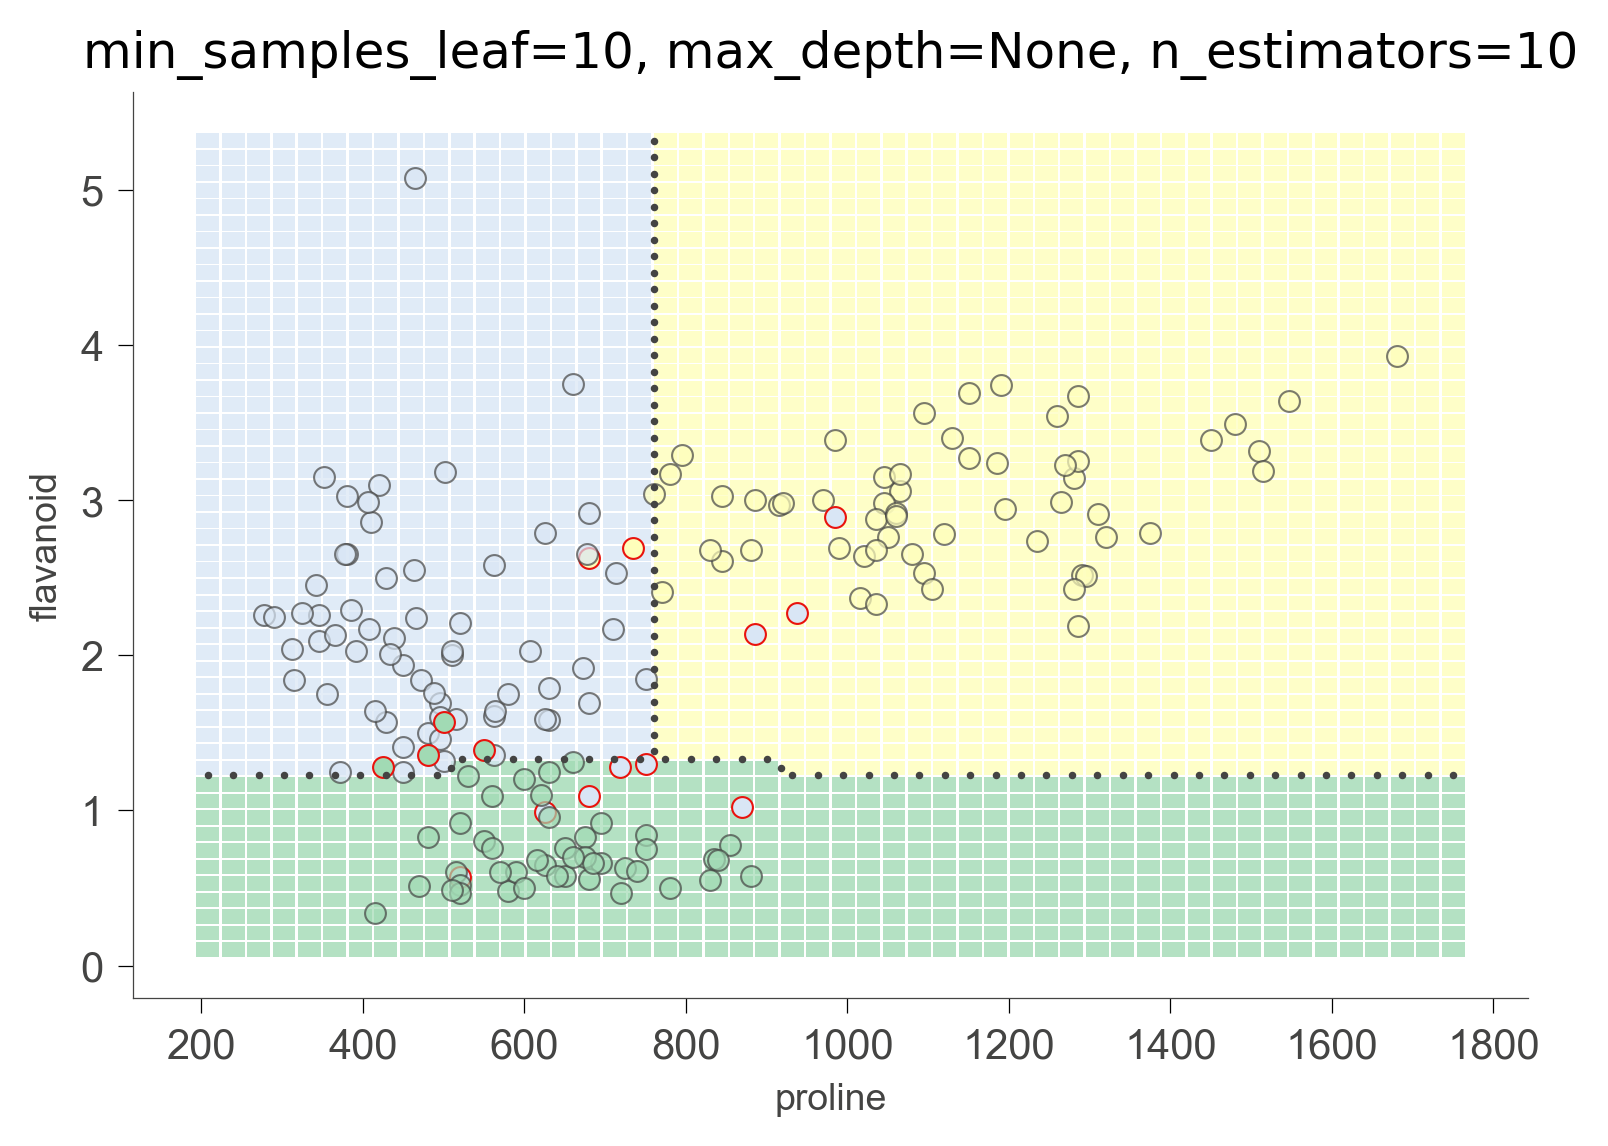

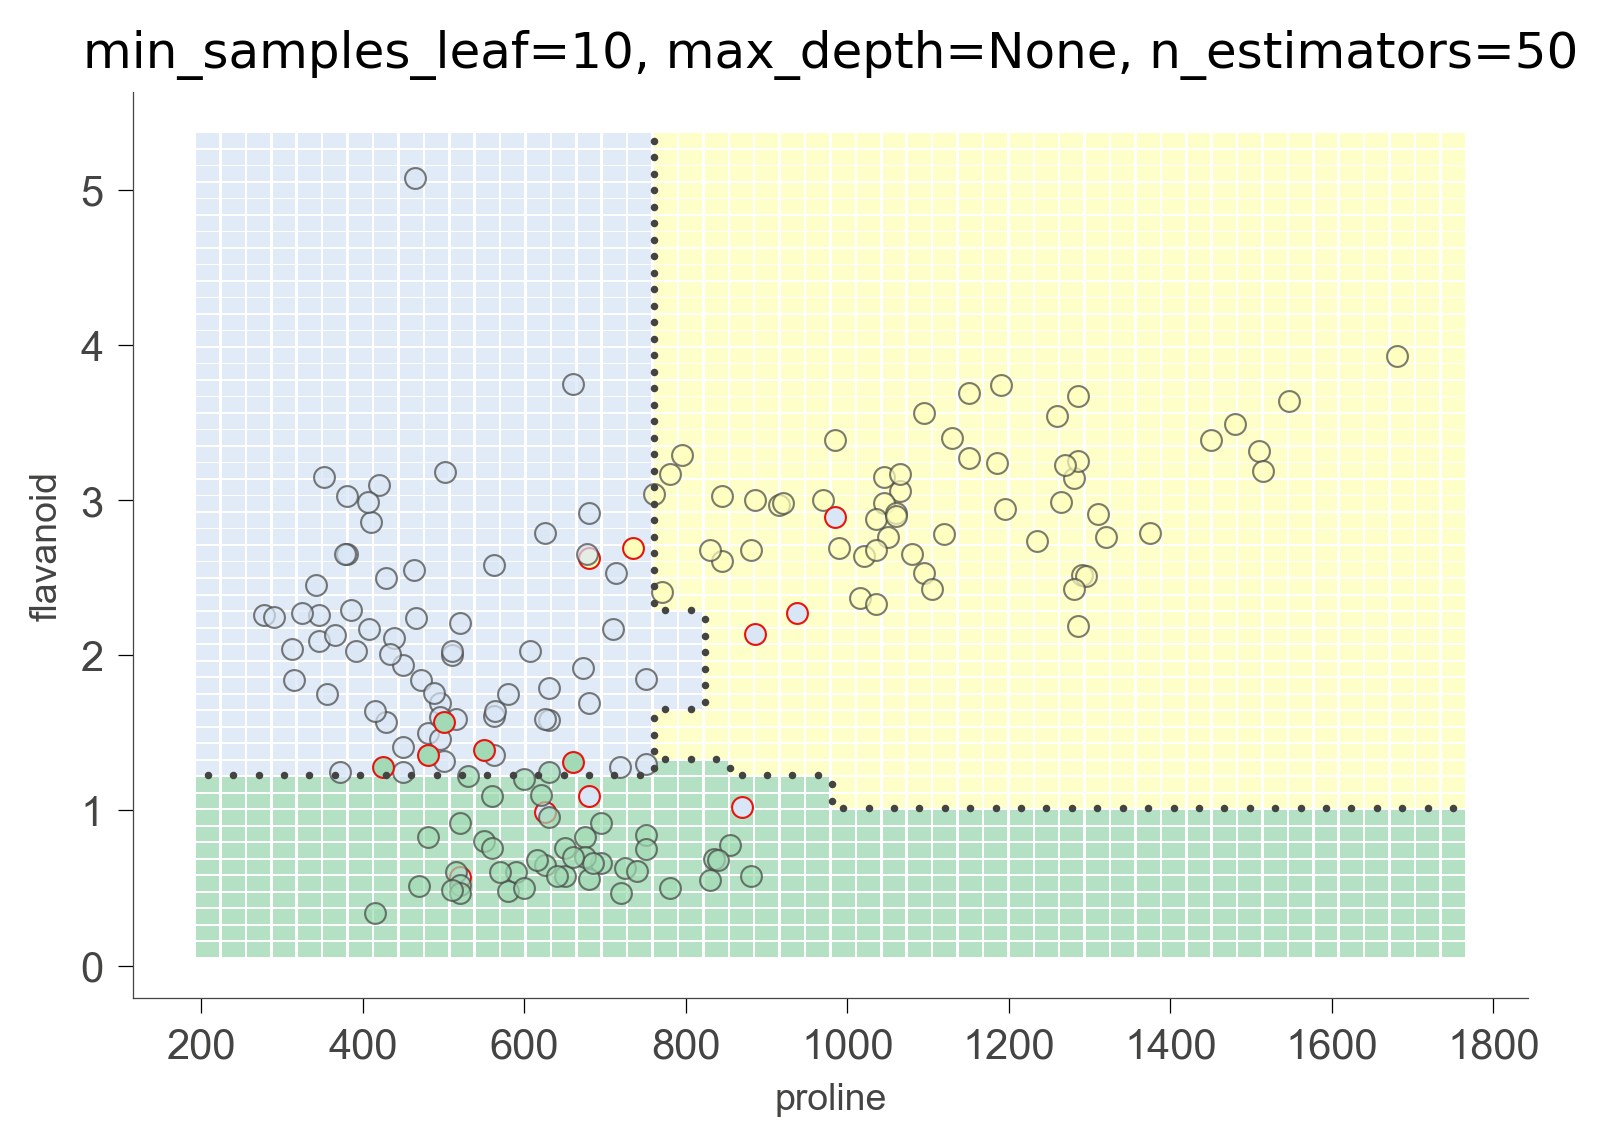

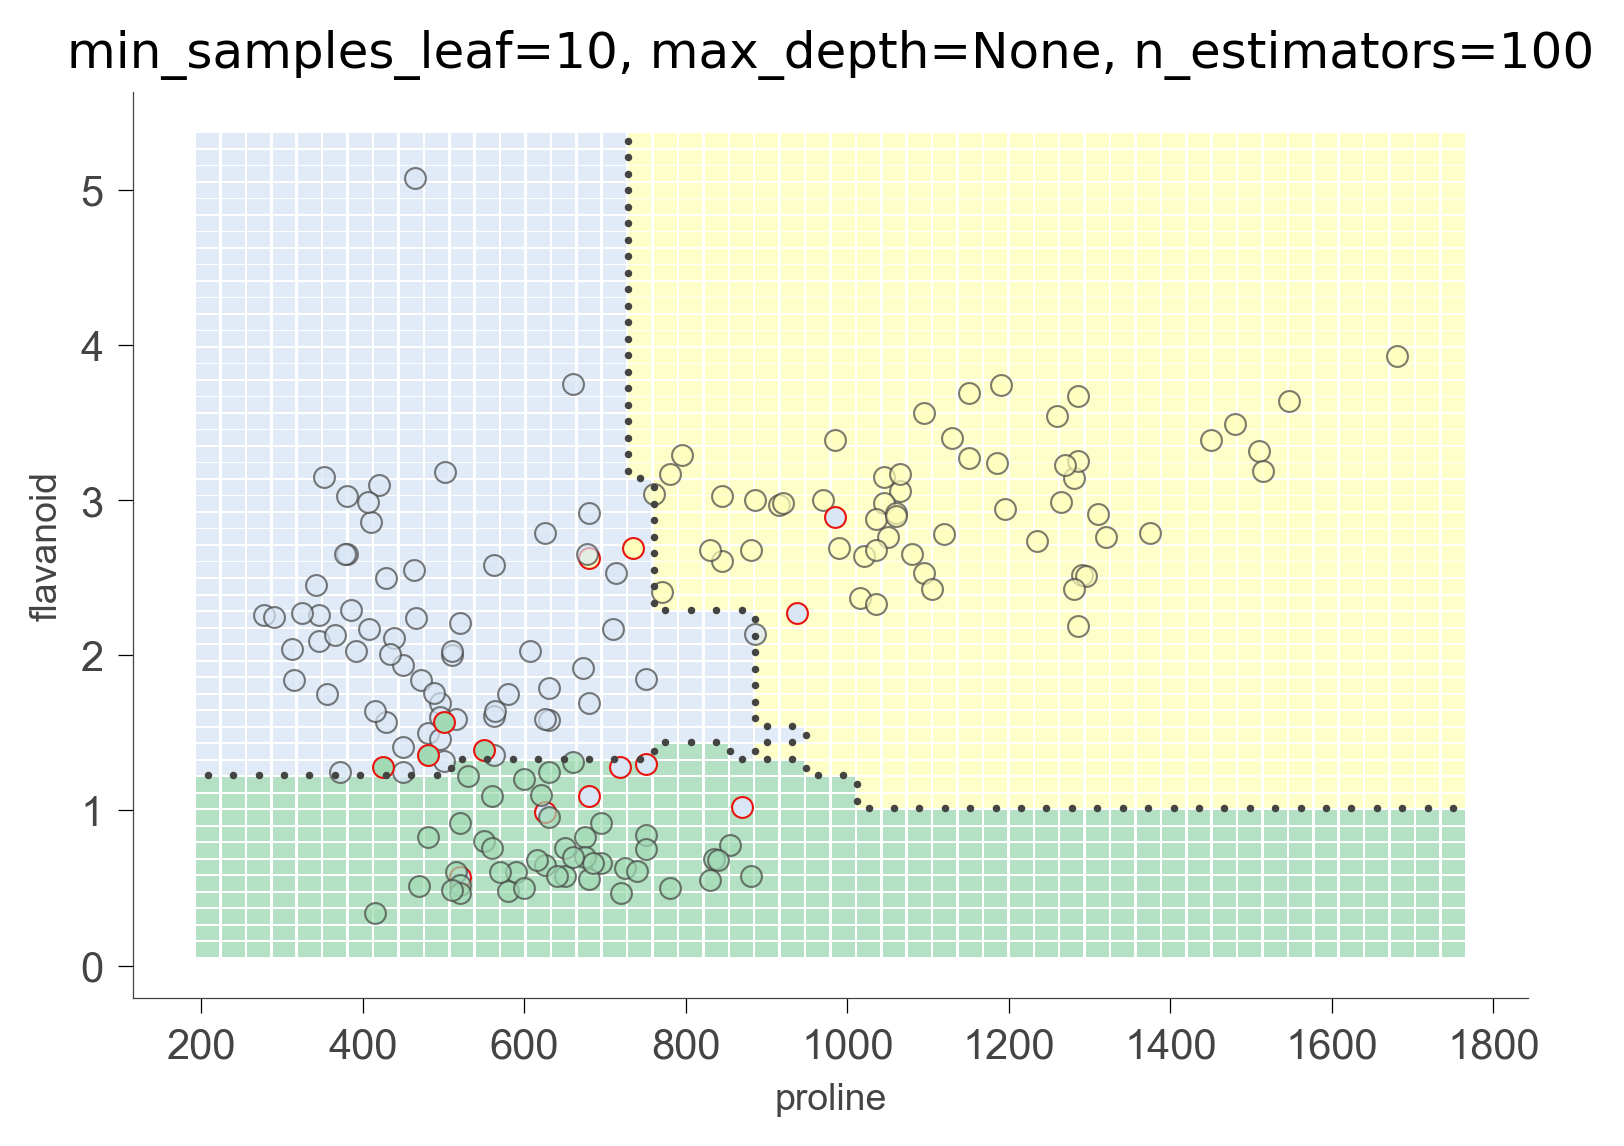

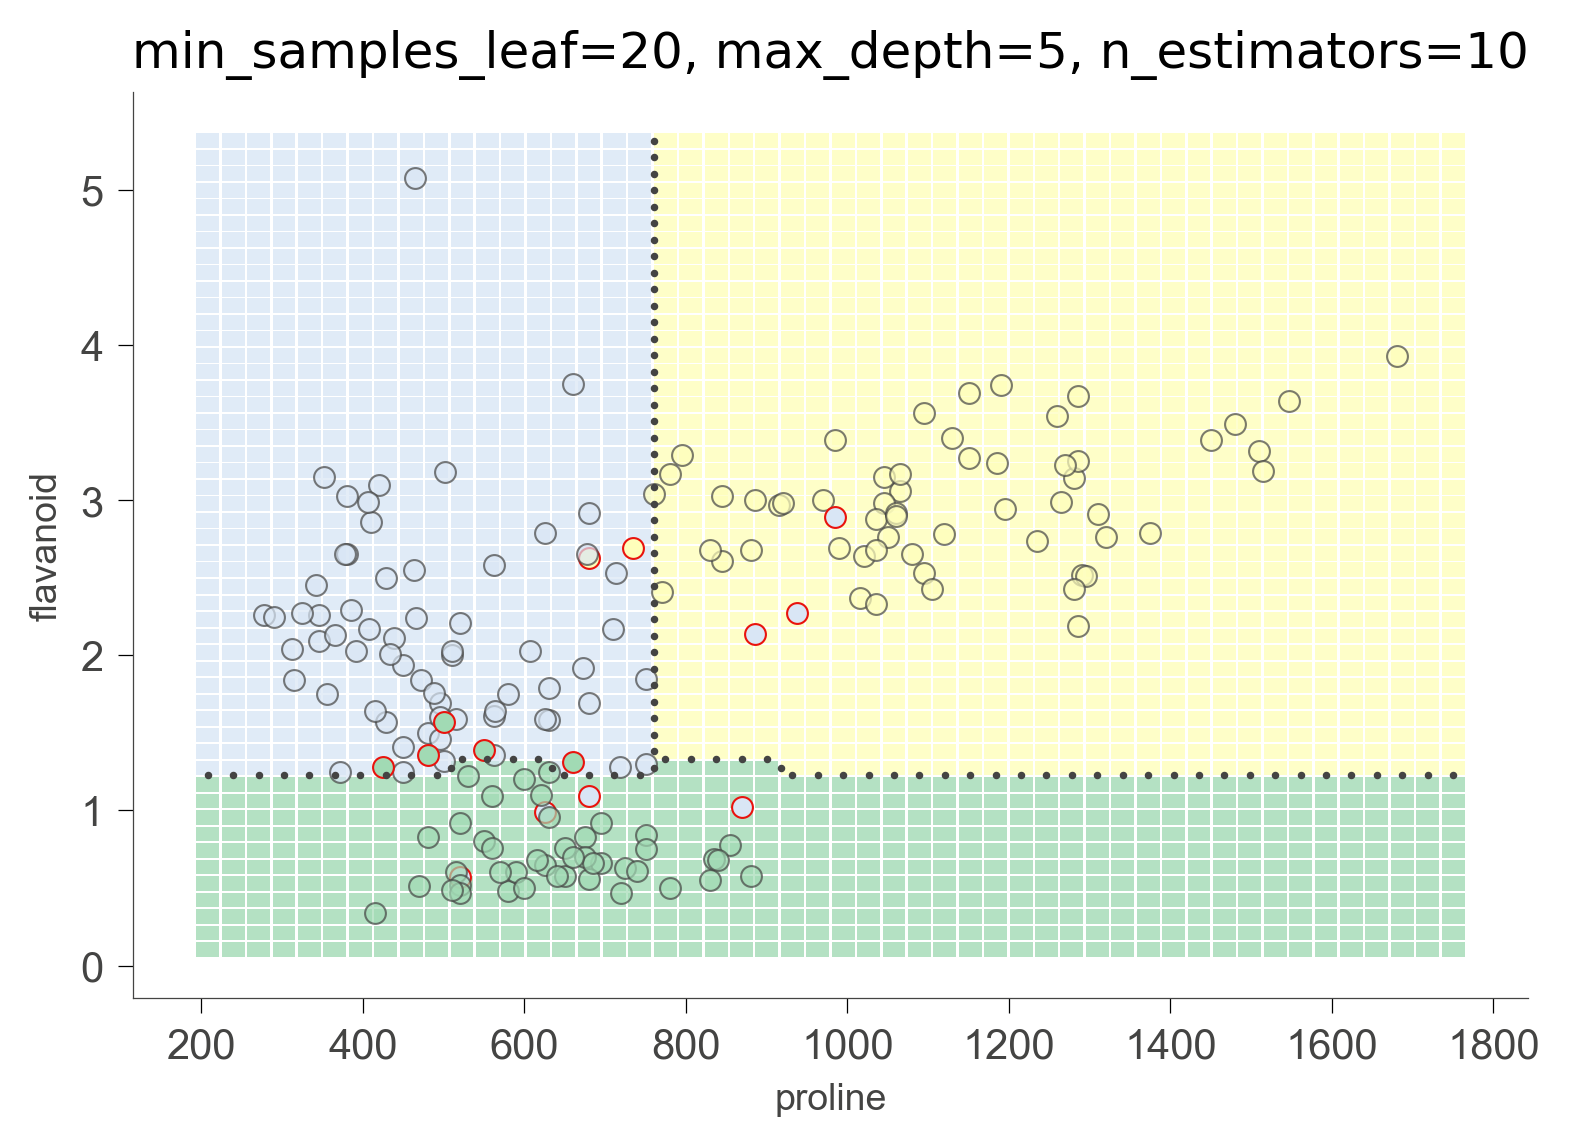

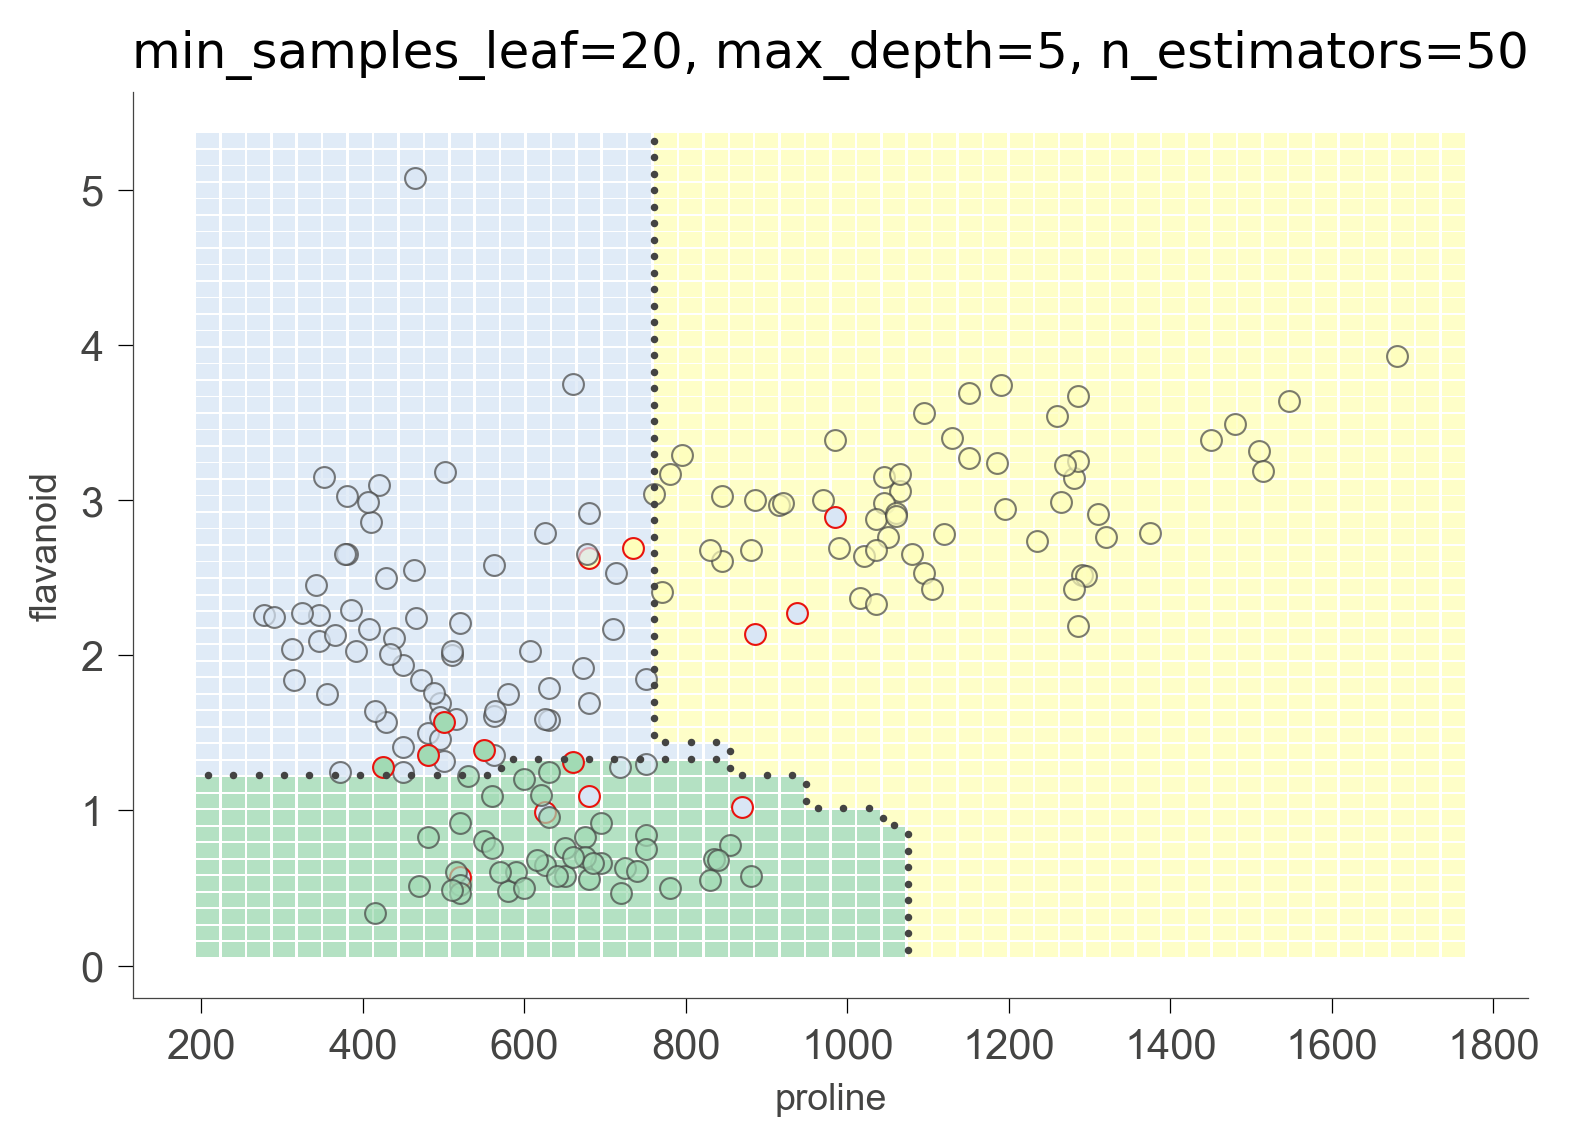

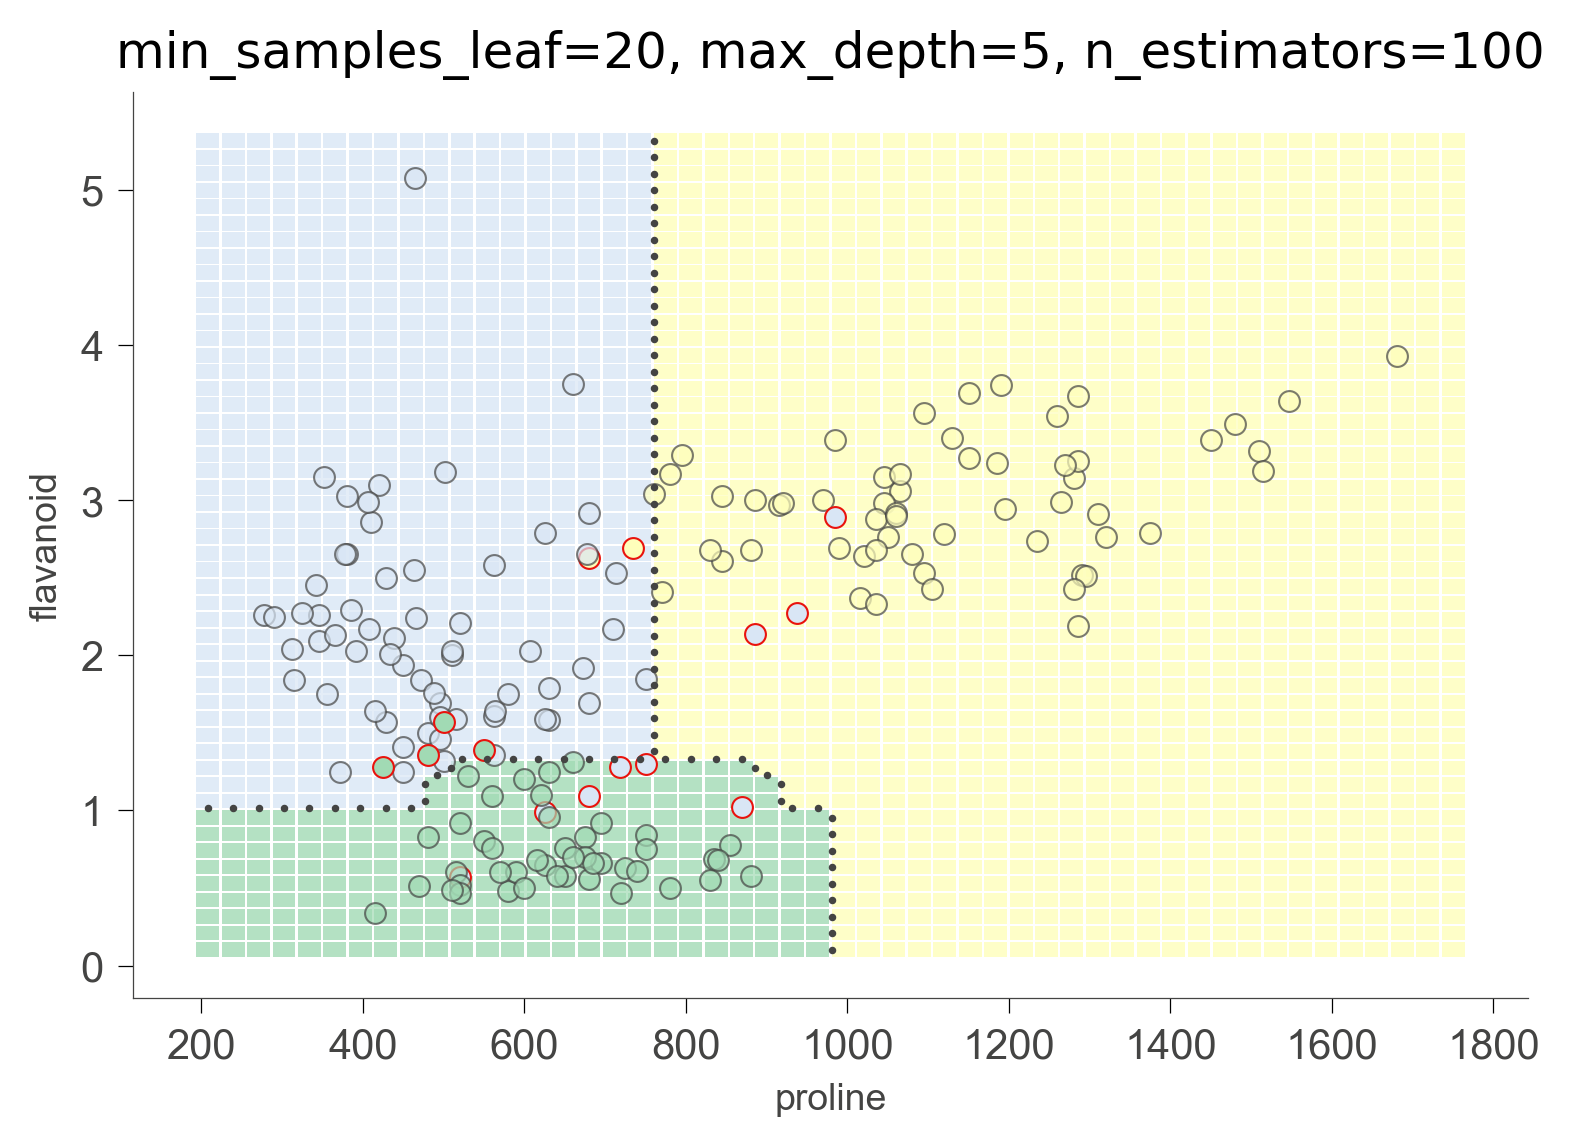

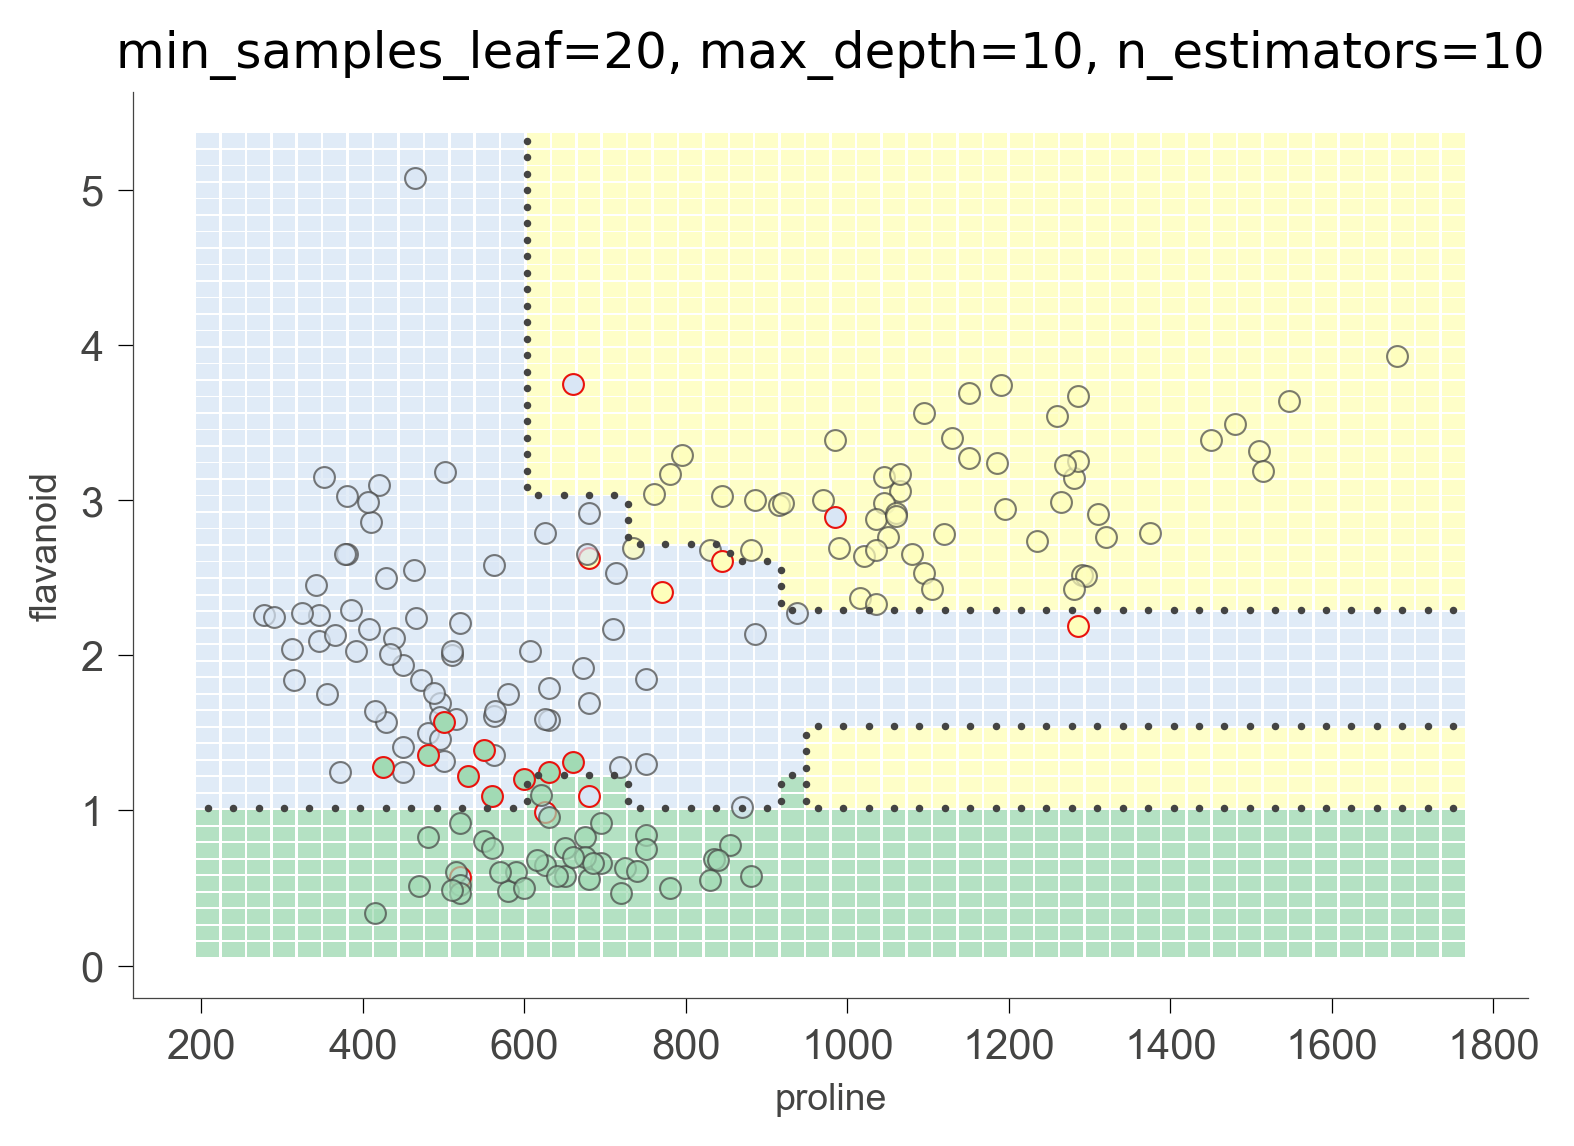

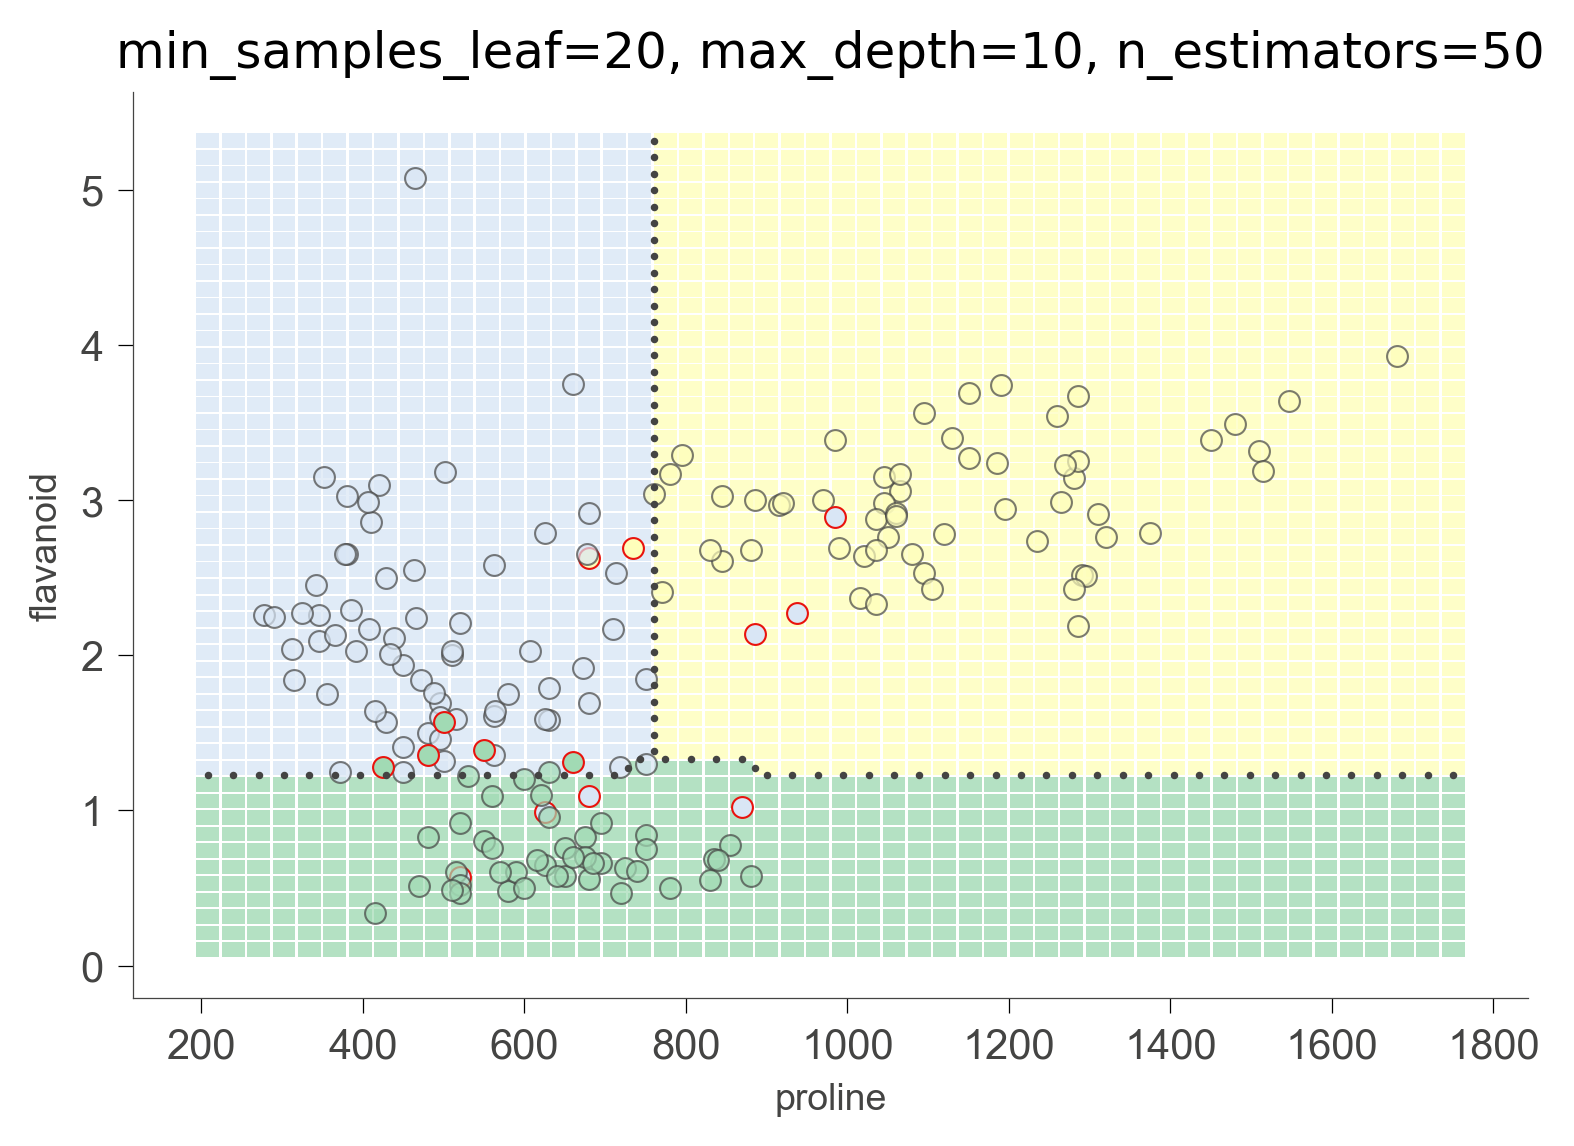

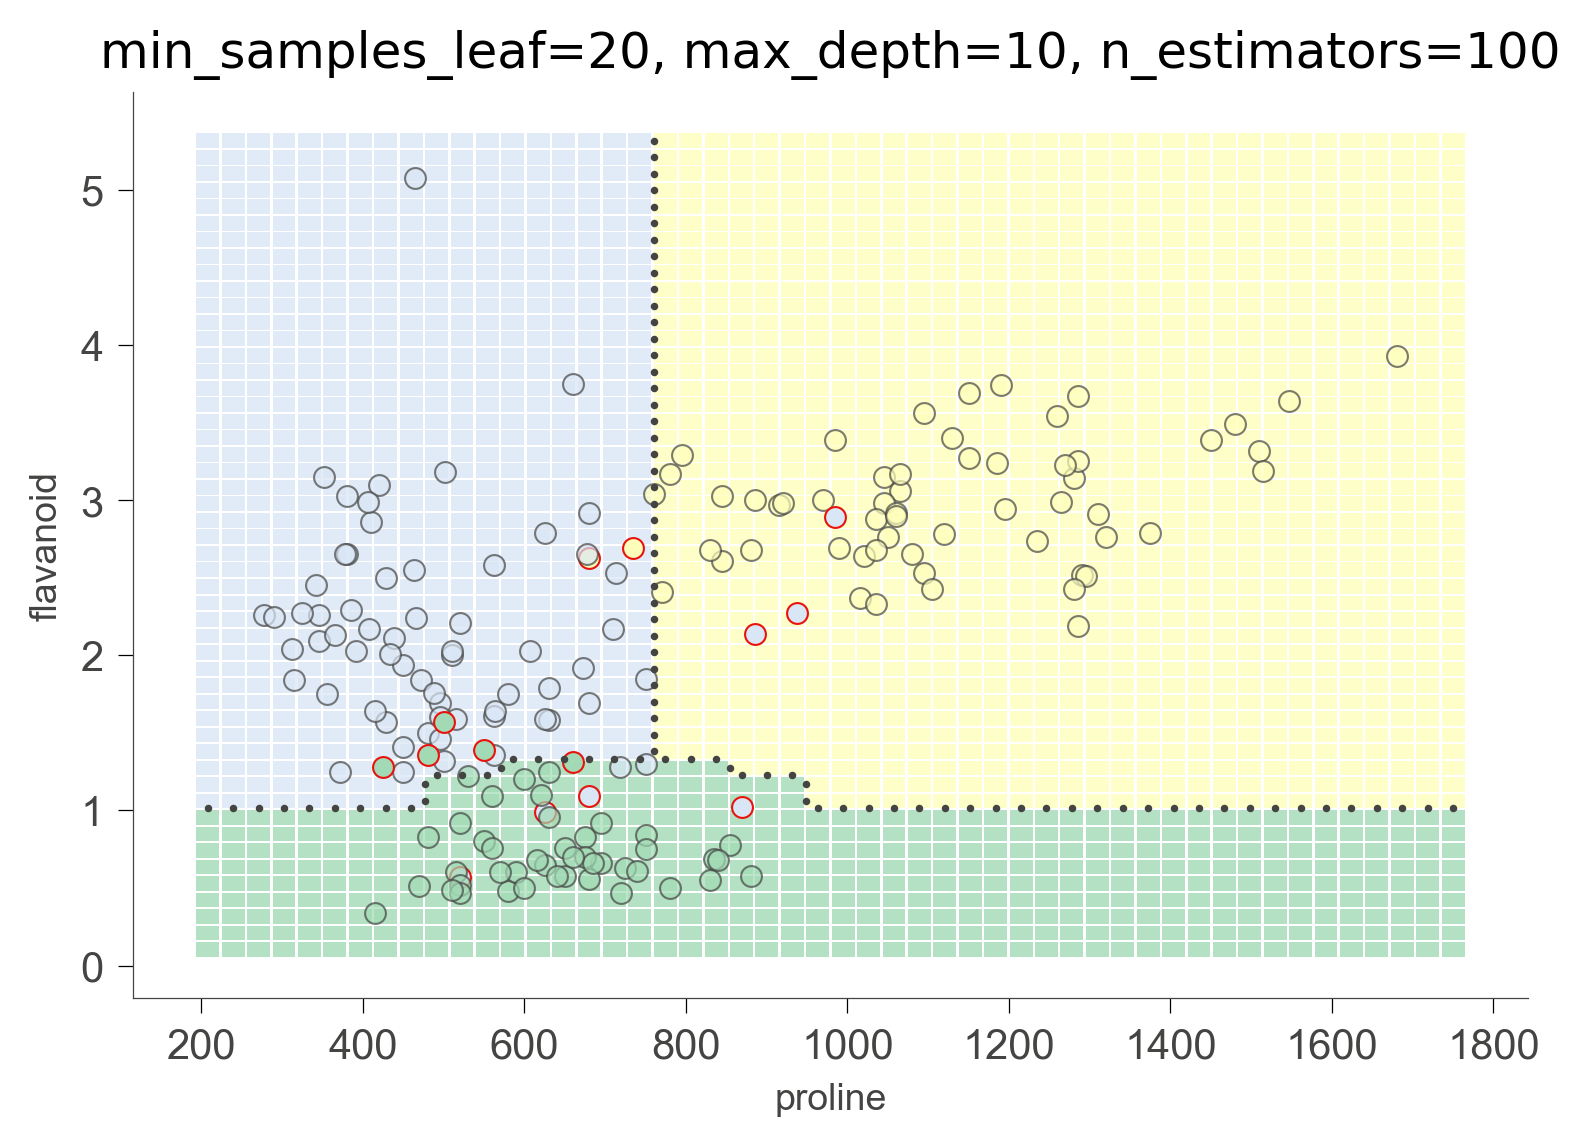

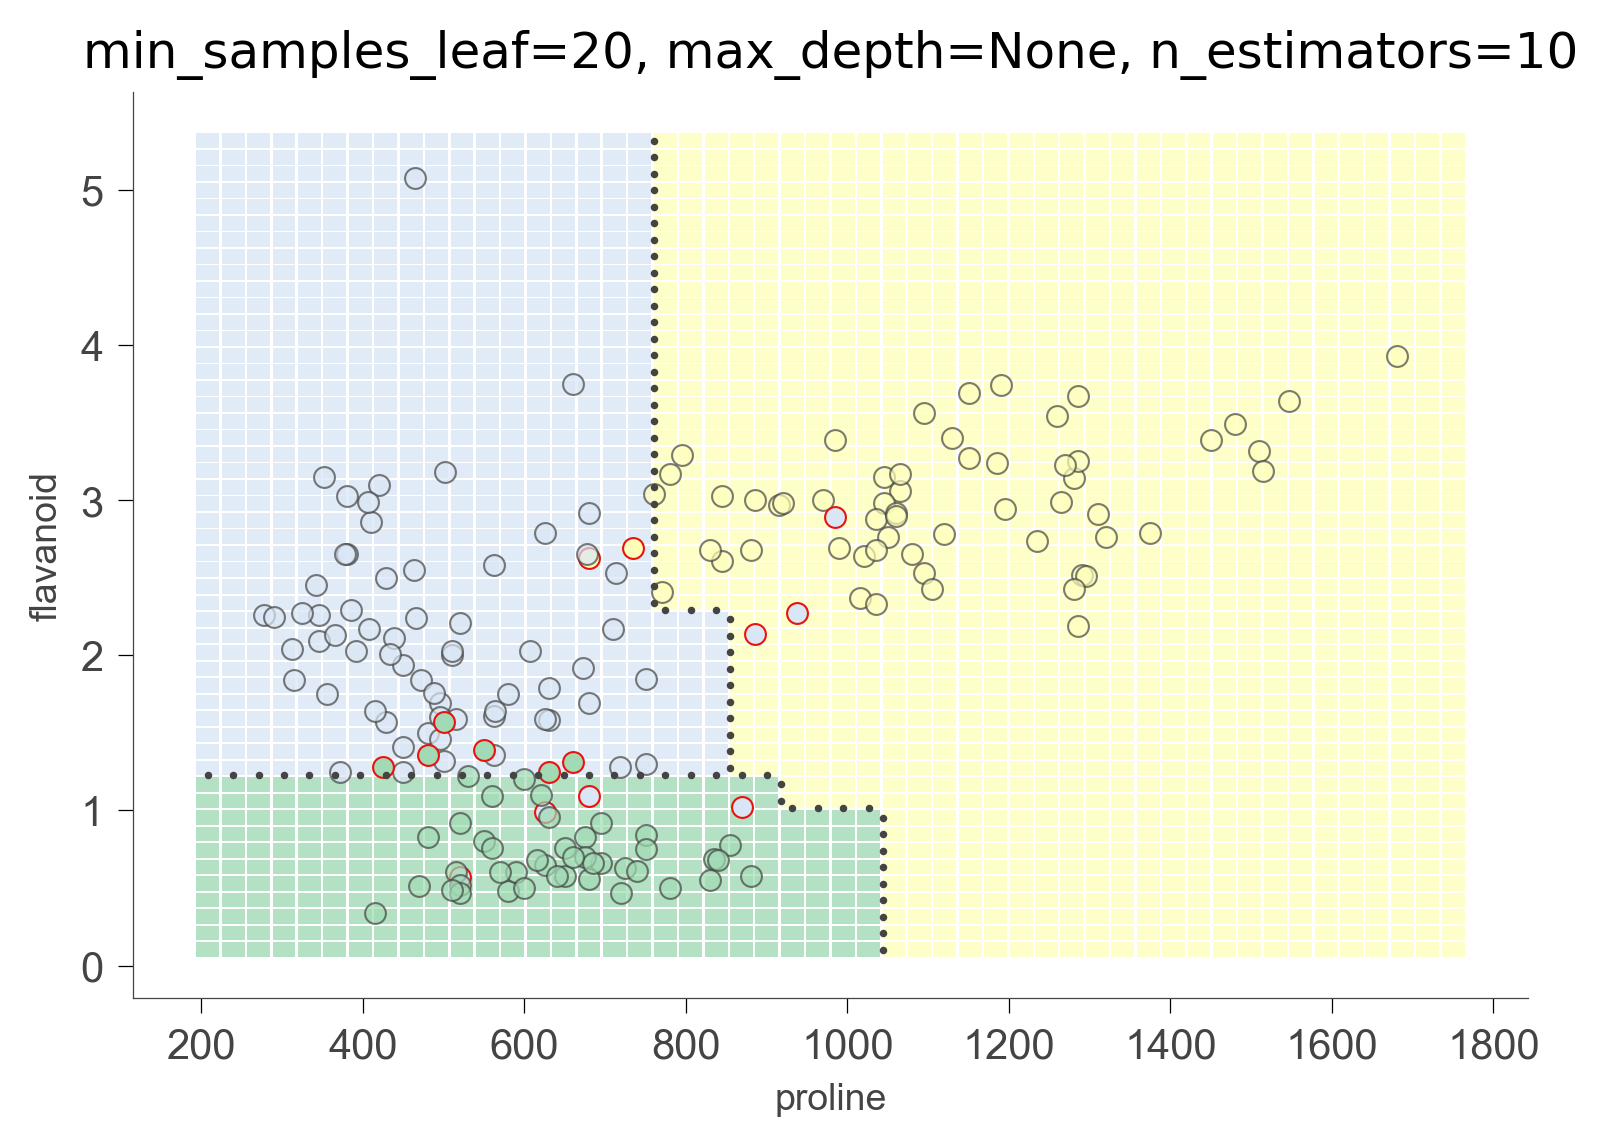

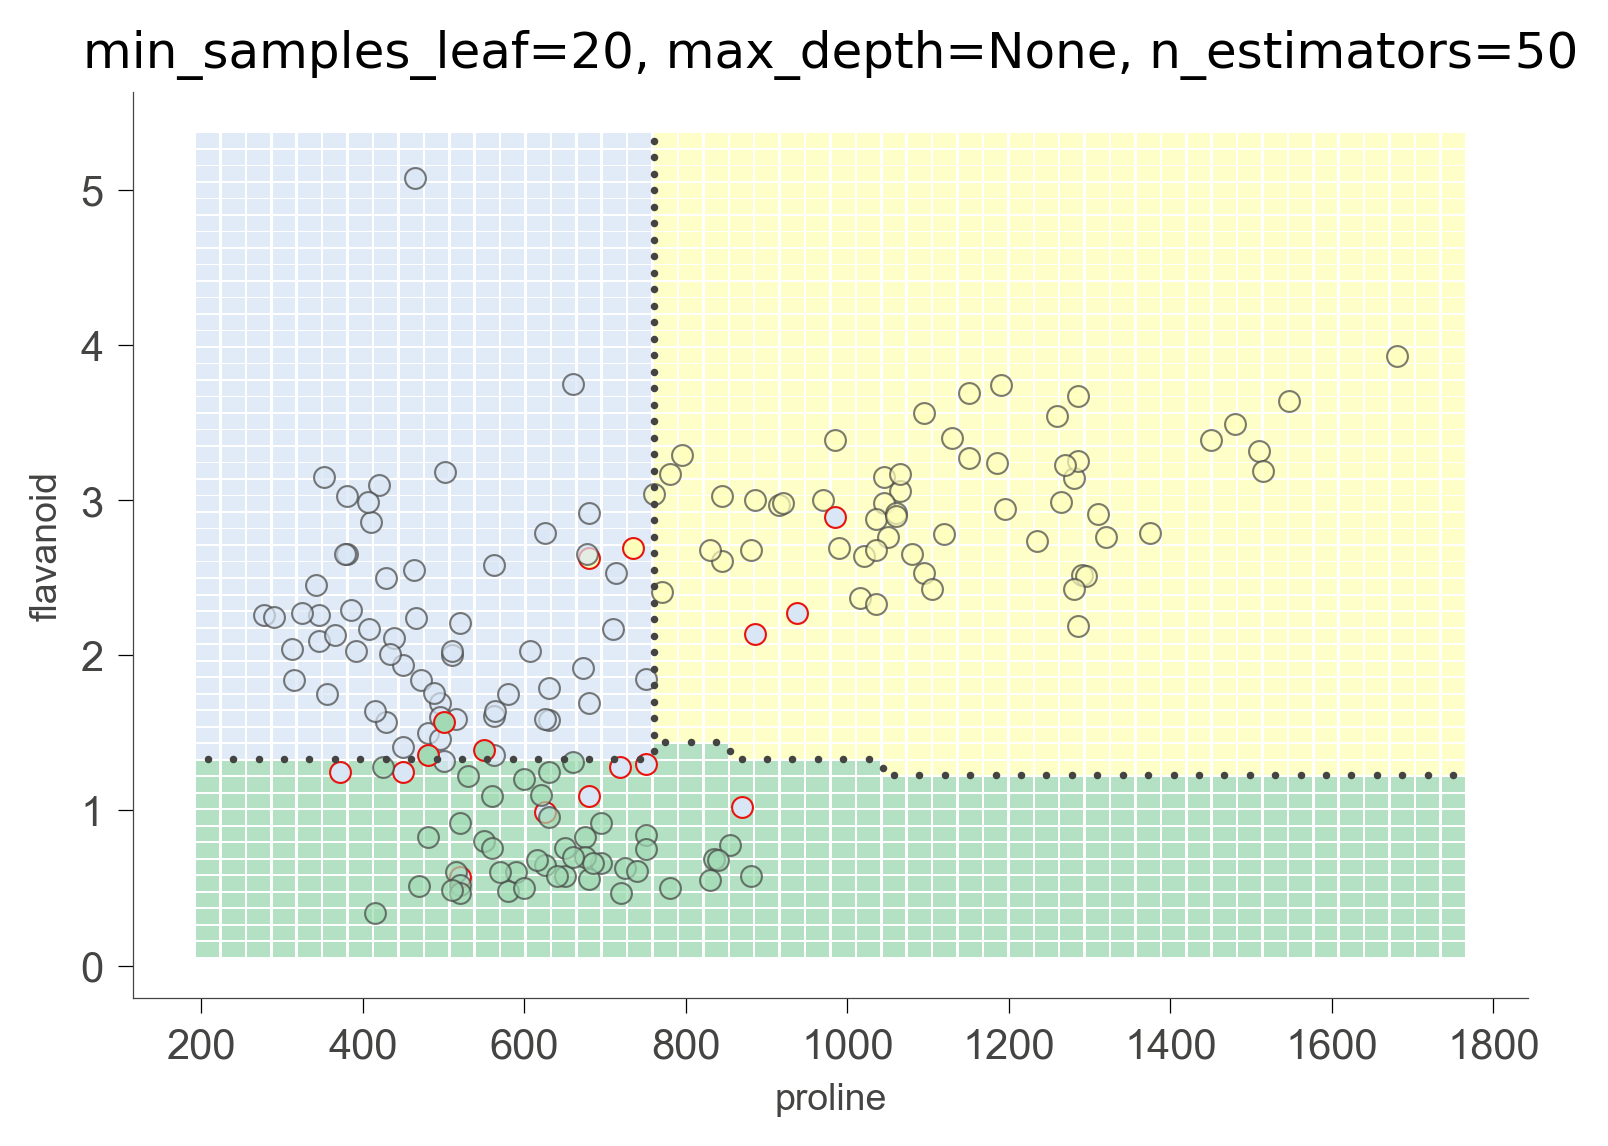

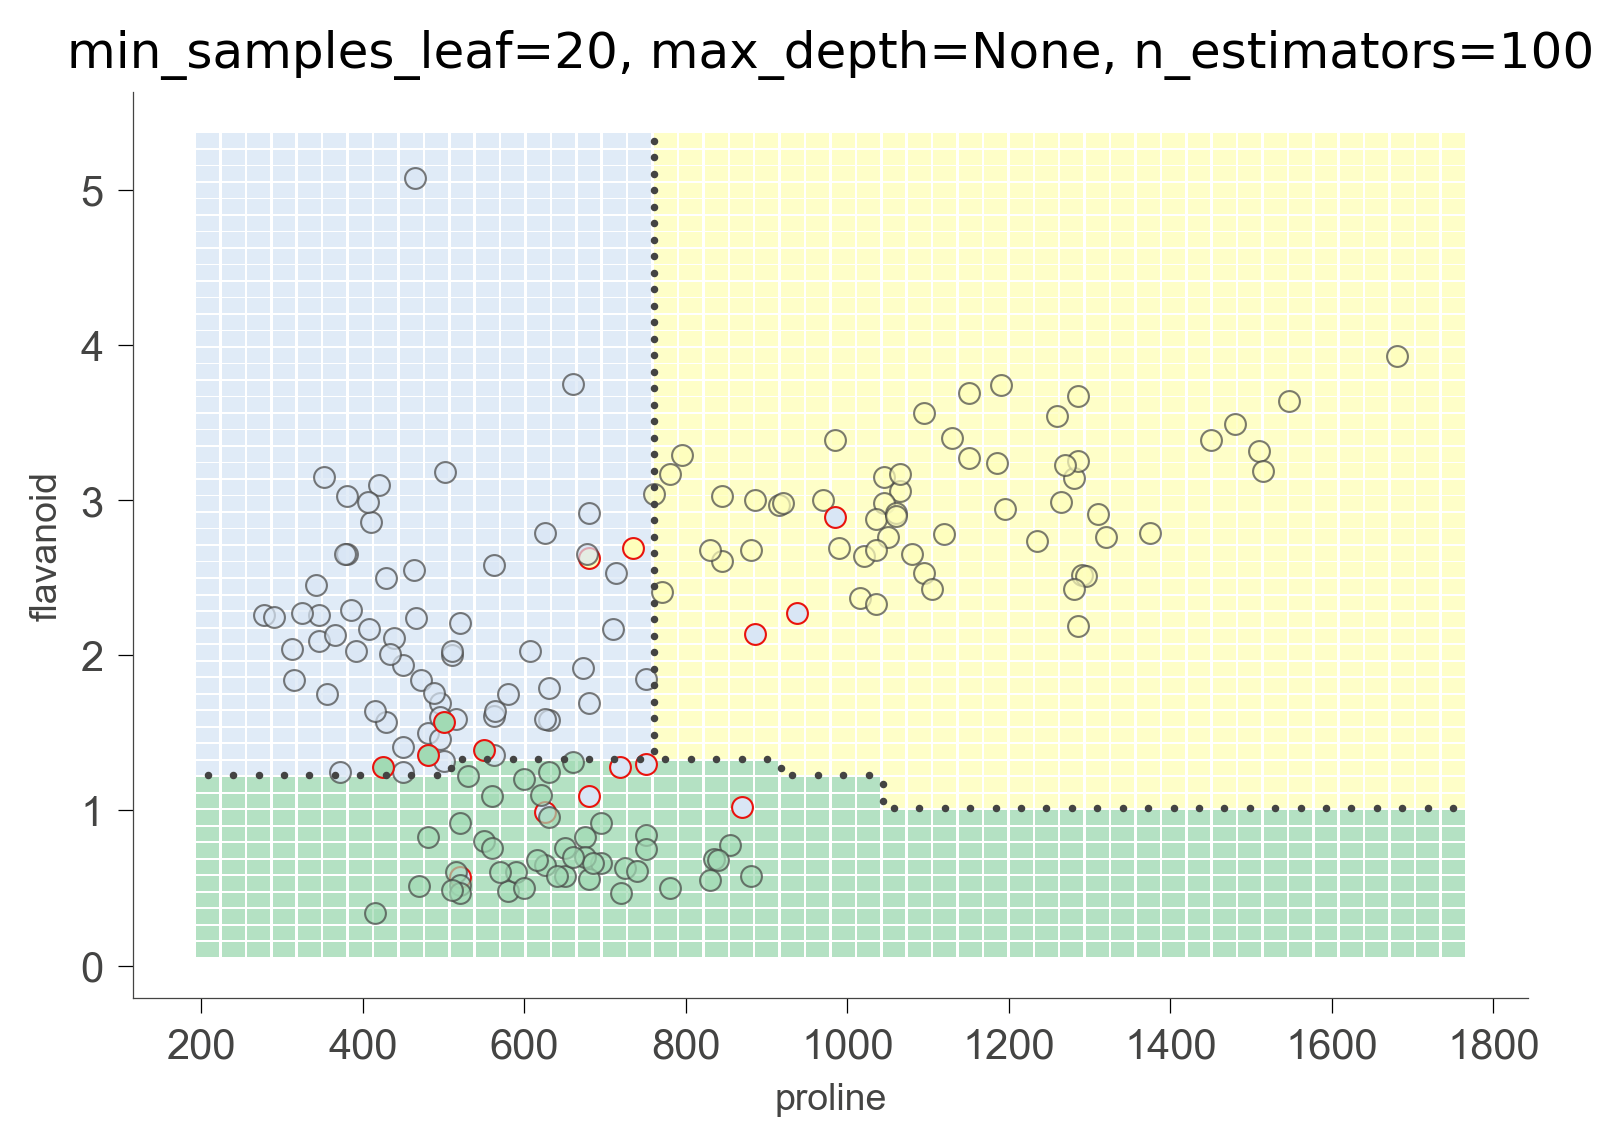

In [14]:
# EDIT HERE
#A loop to try different values for each of the above parameters in the random forest
for min_samples in [5, 10, 20]:
    for max_depth in [5, 10, None]:
        for n_estimators in [10, 50, 100]:
            rf = RandomForestClassifier(n_estimators=n_estimators, 
                                        min_samples_leaf=min_samples, 
                                        max_depth=max_depth, 
                                        n_jobs=-1)
            rf.fit(X, y)
            fig, ax = plt.subplots(1, 1, dpi=300)
            decision_boundaries(rf, X, y, ax=ax, 
                                show=['instances', 'boundaries', 'misclassified'], 
                                feature_names=['proline', 'flavanoid'])
            plt.title(f"min_samples_leaf={min_samples}, max_depth={max_depth}, n_estimators={n_estimators}")
            plt.show()

In [15]:
# EDIT HERE

In [16]:
# EDIT HERE

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  After completing the above analysis, write your observations below! Give a well thought-out answer here!

</div>

---

Lower min_sample_leaf creates more complex decision boundaries, as there are many small leaf nodes. This may result in overfitting, but I would argue lower values are better for this specific dataset. They do occasionally create weird enclave boundaries, but they doe not reduce the accuracy.  Higher n_estimators values produced smoother decision boundaries, while lower ones created weird shapes that did not even increase the number of good predictions. Higher max_depth values (as well as lack of max_depth) made decision boundaries that accounted for more points, thus also increasing variance. Overall, it seems like decision boudnaries with lower min_sample_leaf, no max_depth, and higher n_estimators are able to achieve maximum accuracy in this wine dataset.

---

# BONUS B1 - PCA

For this bonus problem, run PCA on the **full** wine dataset we imported above! (meaning you don't have to split your data into trainig and test)

In [17]:
from sklearn.decomposition import PCA

<br/>
<div class='info'>
    
<font size='5'>👆🏽</font> **Note:** I have **intentionally** not given you a code example for this problem! Try **reading the sklearn documentation** and use what we currently know to see how to specify a PCA yourself!
    
</div>

In [18]:
# EDIT HERE
from sklearn.preprocessing import StandardScaler
X = wine.data

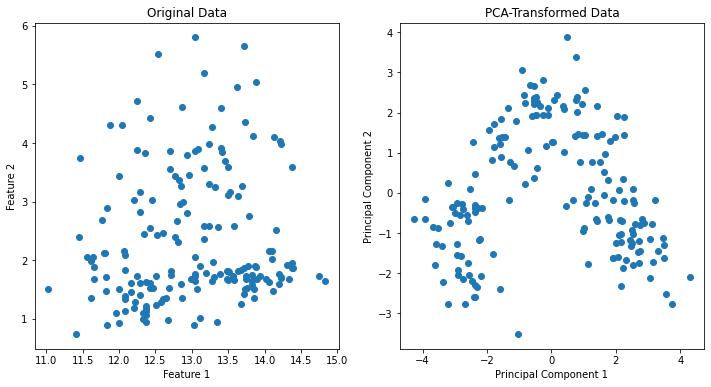

In [19]:


#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#setting up the 2 component PCA
pca = PCA(n_components = 13)

#applying the PCA on scaled dataset
pca_result = pca.fit_transform(X_scaled)

#Plot the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#Plot the PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

Text(0, 0.5, 'Acucmulative variance')

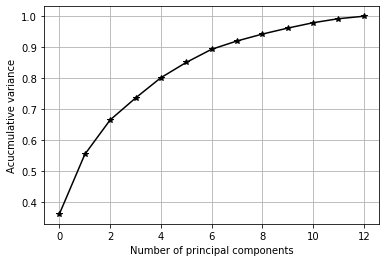

In [20]:

pca_ratio = pca.explained_variance_ratio_ 
#now let's check how much total variance is captured as K increases
#this is based on the value of k=30
plt.plot(np.cumsum(pca_ratio),'k*-')
plt.grid()
plt.xlabel('Number of principal components')
plt.ylabel('Acucmulative variance')

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment below on the quality of the fit! How did PCA do on this dataset? Give a good answer here!

</div>

---

Two principal components would only explain 70% of the dataset variance. Six would be enough to explain as much as 90%, and going with any more components adds minimial margian increase to the amount of variance explained. Overall, it seems like it is worth to apply a 6 component PCA on this dataset.

---

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Explain what exactly PCA is **doing** to our dataset. How is it different than linear regression? Comment below!

</div>




---

PCA is a dimensionality reduction method. Unlike linear regression, it is unsupervised and does not care about original feature labels and target variables. PCA groups varaibles with a lot of covariance into one new variable that we call a Principal Component. This reduces the total number of variables to only the most valuable ones. Linear regression is a simple predictive model that uses a simple equation to see how each variable in a dataset correlates with a single target variable. They are two completely different ML technqiues.

---

# Bonus B2 - KMeans

For this problem run a **K-Means** on the **result of your PCA dimensionality reduced data** for the following:
- 2 components
- 5 components
- 10 components

**And give the three plots!**

<br/>
<div class='info'>
    
<font size='5'>👆🏽</font> **Note:** I have **intentionally** not given you a code example for this problem! Try **reading the sklearn documentation** and use what we currently know to see how to specify a KMeans yourself!
    
</div>

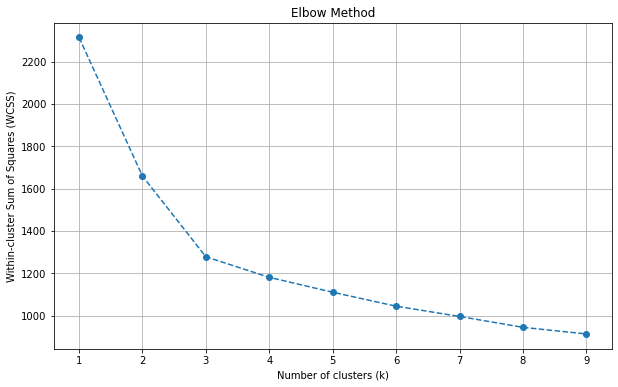

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs  



#Range of k to try
k_values = range(1, 10)       #1-9 range

#Storing the within-cluster sum of squares for each k  (WCSS)
wcss = []

#Calculating WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)  # this is the error

#Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


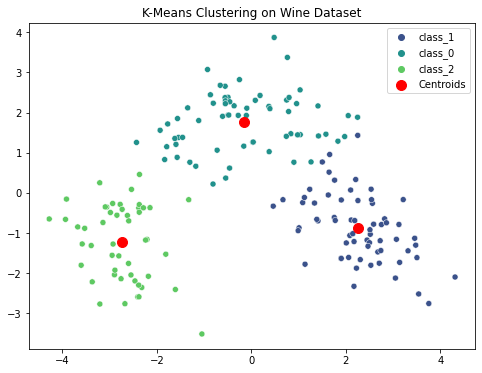

In [22]:
#here we chang the number of components
pca2 = PCA(n_components = 2)

#setting up pca
pca_result2 = pca2.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans2 = kmeans.fit_predict(pca_result2)

#Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result2[:, 0], y=pca_result2[:, 1], hue=wine.target_names[y_kmeans2], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')   

plt.title('K-Means Clustering on Wine Dataset')
plt.legend()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


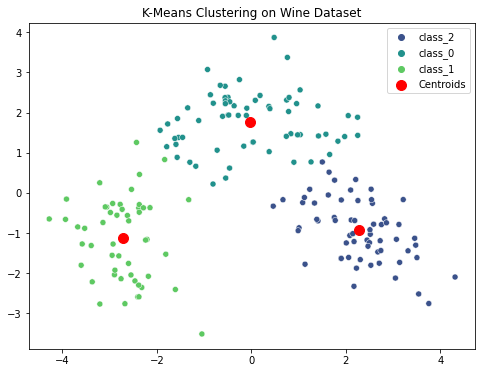

In [23]:
#here we chang the number of components
pca5 = PCA(n_components = 5)

#setting up pca
pca_result5 = pca5.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans5 = kmeans.fit_predict(pca_result5)

#Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result5[:, 0], y=pca_result5[:, 1], hue=wine.target_names[y_kmeans5], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')   

plt.title('K-Means Clustering on Wine Dataset')
plt.legend()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


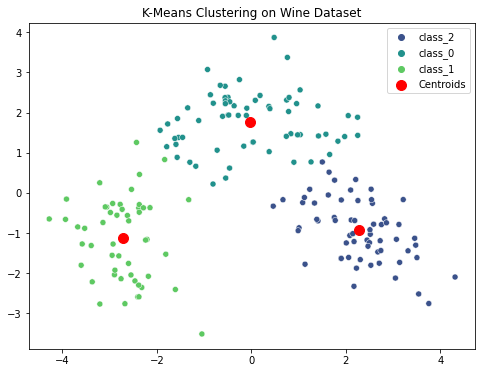

In [24]:
#here we chang the number of components
pca10 = PCA(n_components = 10)

#setting up pca
pca_result10 = pca10.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(pca_result10)

#Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result10[:, 0], y=pca_result10[:, 1], hue=wine.target_names[y_kmeans], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')   

plt.title('K-Means Clustering on Wine Dataset')
plt.legend()

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  How are KMeans KNN's different? How are they similar? Explain!

</div>

---

We can assume that the KNNs ran on PCAs with more components include more complex decision boundaries and account for more variance of the original dataset. Nevertheless, we really only learned how to visualize few components in those KNN plots, so they all look pretty similar since they display the differences between the same components. A more advanced multi-dimensional plot or a mathematical calculation would be required to assess their differences thoroughly.

---

# Problem 1


Lets discuss a **regularized linear regression** given by:

$$
\min_w \| \boldsymbol{X}w-y \|^2_2 + \alpha \|w\|^2_2 
$$

## 1.A
This equation has two terms. The term on the left is the usual **linear regression error** we discussed in class.

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  If $\boldsymbol{X}$ is of size $100 \times 3$,

- what is the dimension of $w$?
- what is th dimension of $y$?
- how big is my dataset?

</div>

---

If X dimensions are 100x3 it means that it contains 100 samples with values across 3 categories. This implies that there are 300 distinct elements in X. According to vector multiplication rules, dimensions of w must be 3x1. 3 rows allow us symmetry with the 100x3 shaped X that allows proper multiplication. 1 column is used because generally linear regression predicts correlation with only one outcome variable. Dimensions of y are 100x1, since y represents our actual target variable values. It has 100 values for each sample in X, but it only tracks their outcomes across one variable, since we are working with a normal single-output linear regression.

---

# 1.B

Now for the second term!

<br/>
<div class='info'>

<font size='5'>🤔</font> **Questions:** Explain in words what the second term is doing? How does having it in here **regularize** the problem?

</div>

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Hint:**  We gave three different explanations for this in class! 

</div>

---

The second term is alpha multiplied by w in an L2 norm form. w here represents the sum of the squares of the weight coefficients in the data, while alpha represents how much we want our data regularized. Large alpha values increase the penalty for large weight coefficients, which reduces overfitting of the linear model. Adjusting alpha can increase the generalizability of the model, but it will make it a incrementally worse at predicting the training dataset. Regularization also helps to account for colinearity as it adjusts the weight distribution of coefficients.

---

## 1.C

In sklearn, the regularized linear regression is implemented in a class called `Ridge` in the `linear_model` module, and takes an `alpha` parameter as discussed above:

In [25]:
from sklearn.linear_model import Ridge

In [26]:
Ridge?

Lets implement this model on the same wine dataset above with different `alpha` values:

In [27]:
alphas = [1e-2,1e-1,0.5,1,5]

Type your code below:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [29]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#empty list to store the mean squared errors for different alpha values
mse_list = []

#loop over the different alpha values
for alpha in alphas:
    #create a Ridge linear regression model
    ridge_model = Ridge(alpha=alpha)
    
    #fit the model to the training data
    ridge_model.fit(X_train, y_train)
    
    #make predictions on the test data
    y_pred = ridge_model.predict(X_test)
    
    #calculate the mean squared error 'mse'
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    print(f"Alpha: {alpha}, MSE: {mse}")


Alpha: 0.01, MSE: 0.06853515560532414
Alpha: 0.1, MSE: 0.06855025297438658
Alpha: 0.5, MSE: 0.06861852631063907
Alpha: 1, MSE: 0.06870614637301291
Alpha: 5, MSE: 0.06945241286742226


## 1.D

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  Comment on what you observe here. Which does better? Why? Does this make sense given what we've discussed in class? Why or why not? I'm not looking for a short answer here!

</div>

---

Looking at mse alone, the lowest alpha of 0.01 has the lowest error value of 0.0685. This means that the model is not overfitting much on the split test dataset. If the entirety of wine datasets are just like ours, then using an alpha of 0.01 would produce the most accurate regularized linear model. The model does not need much regulatization then, which can be explained by it being a standard ML dataset which features are most likely all good predictors.

---

# Problem 2

## 2.A

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Question:** Explain these concepts in words:
- underfitting
- overfitting
- bias
- variance

Draw a figure (draw it yourself, **not** using any code) to aid in your explanation!
   
</div>

**Note:** Once you've drawn this figure, either on paper, or using your mouse using an online tool, etc. you can **embed it** into your notebook like this:

```
![](foldername/figurename.jpg)
```

---

Overfitting is when a predictive model learns the training data too well. This means that even random noise in the training data is accounted for by the model. When this model will be exposed to real life data, it will not be able to predict it accurately because the real data is not identical to training data. Underfitting is the opposite, when a model does not learn training data well enought. This often happens when the model choice is incorrect for the underlying data trend, perhaps if we use a linear model on variables with a non-linear relationship. Such model would most likely perform poorly on both training and testing and real life data.

Bias is a measure of how much the model assumes about the data without actually fitting it. High bias models tend to be undefitting, as they are very simple and do not account for much of the data. Variance is a measure of how complex the model is. High variance model may be overfitting, as they try to account for trends in data that may be very minor or may be just noise.

![](/Users/madibaltagulov/Downloads/Bias_Variance.jpg)

---

## 2. B

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  Above, you explained waht the `C` parameter does for SVMs. Now, explain it but from the perspective of **regularization**! That is, how does it act as a regularizer for the SVM? Think about it!

</div>

---


A small C value means that the SVM model has high regularization. Small C imposes high penalties for misclassified data. This means that the model will produce very smooth simple decision boundaries, ignoring many outliers. This can lead to underfitting. A high C values encourages the model to include as many fringe data points as possible, making the decisions boundary complex. This means that the model captures more of the data correctly, but may lead to overfitting the boundary to the training data.

---

# Problem 3 - Machine Learning Mini Project

On this final, I want you to use everything you've learned and try to do a simple problem from start to finish on your own!

Lets use a dataset from Spotify on song popularity. Lets first modify the dataset for our final:


# Initial Preparation

In [30]:
df = pd.read_csv('song_data_orig.csv')
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

As we can see, `song_popularity` is actually a numeric column:

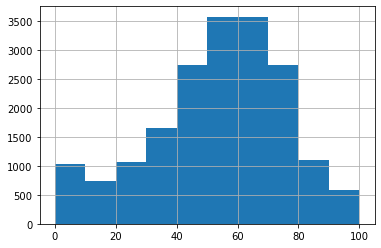

In [31]:
df['song_popularity'].hist();

Lets make this a "class label" called `is_pop` using a threshold value of 80:

In [32]:
df['is_pop'] = (df['song_popularity'] >= 80).values.astype('int')

In [33]:
df.query('is_pop == 1')

song_name  song_popularity  \
5                              Bring Me To Life               80   
6                                   Last Resort               81   
8                                Mr. Brightside               80   
9                                   Sex on Fire               81   
13                                   Can't Stop               81   
...                                         ...              ...   
18671             Tie Me Down (with Elley Duhé)               84   
18697  Magic In The Hamptons (feat. Lil Yachty)               85   
18702                                      Body               86   
18704                         If You're Over Me               81   
18734                  Love Lies (with Normani)               89   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
5                235893      0.008950         0.316   0.945          0.000002   
6                199893      0.000504         0.581   0.887          0.001110   
8                222586      0.001080         0.330   0.936          0.000000   
9                203346      0.001720         0.542   0.905          0.010400   
13               269000      0.017900         0.618   0.938          0.000000   
...                 ...           ...           ...     ...               ...   
18671            218295      0.135000         0.548   0.839          0.000000   
18697            164640      0.660000         0.769   0.479          0.000000   
18702            163216      0.047600         0.752   0.764          0.000094   
18704            189000      0.061500         0.647   0.853          0.000000   
18734            201707      0.095600         0.708   0.648          0.000000   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
5        4    0.3960    -3.169           0       0.1240  189.931   
6        4    0.2680    -3.659           0       0.0624   90.578   
8        1    0.0926    -3.660           1       0.0917  148.112   
9        9    0.1360    -5.653           1       0.0540  153.398   
13       9    0.1670    -3.442           1       0.0456   91.455   
...    ...       ...       ...         ...          ...      ...   
18671    6    0.1020    -2.371           1       0.0644   98.932   
18697    1    0.0914    -5.339           1       0.0385   96.051   
18702    1    0.0543    -4.399           1       0.0380  121.958   
18704    8    0.0620    -4.516           1       0.0904  103.846   
18734    6    0.1340    -5.626           1       0.0449  143.955   

       time_signature  audio_valence  is_pop  
5                   4          0.320       1  
6                   4          0.724       1  
8                   4          0.234       1  
9                   4          0.374       1  
13                  4          0.875       1  
...               ...            ...     ...  
18671               4          0.314       1  
18697               4          0.803       1  
18702               4          0.582       1  
18704               4          0.618       1  
18734               4          0.338       1  

[1701 rows x 16 columns]

Now we have our label, so lets get rid of the `song_popularity` so we don't accidentally use it below!

In [34]:
df = df.drop('song_popularity',axis=1)
df.columns

Index(['song_name', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'is_pop'],
      dtype='object')

Now we're ready to proceed!

# Machine Learn!


<br/>
<div class='info'>

<font size='5'>🧑🏽‍💻</font> **CODE-IT-UP**: 
I want you to take this dataset and create at least 4 separate models **(KNN with different values of K all count as a single model)** to predict the `is_pop` variable. 

Assess each of them separately, and then jointly at the end!

    
</div>

# Exploratory Data Analysis (EDA)

Below, conduct some EDA on this dataset. Observe your features. Are they related to each other? If so, how? If not, does that matter?



<br/>
<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: We've been using a great particular plot for EDA in class and on our HW! 

</div>

**Note:** I am **not** asking for a single plot here!

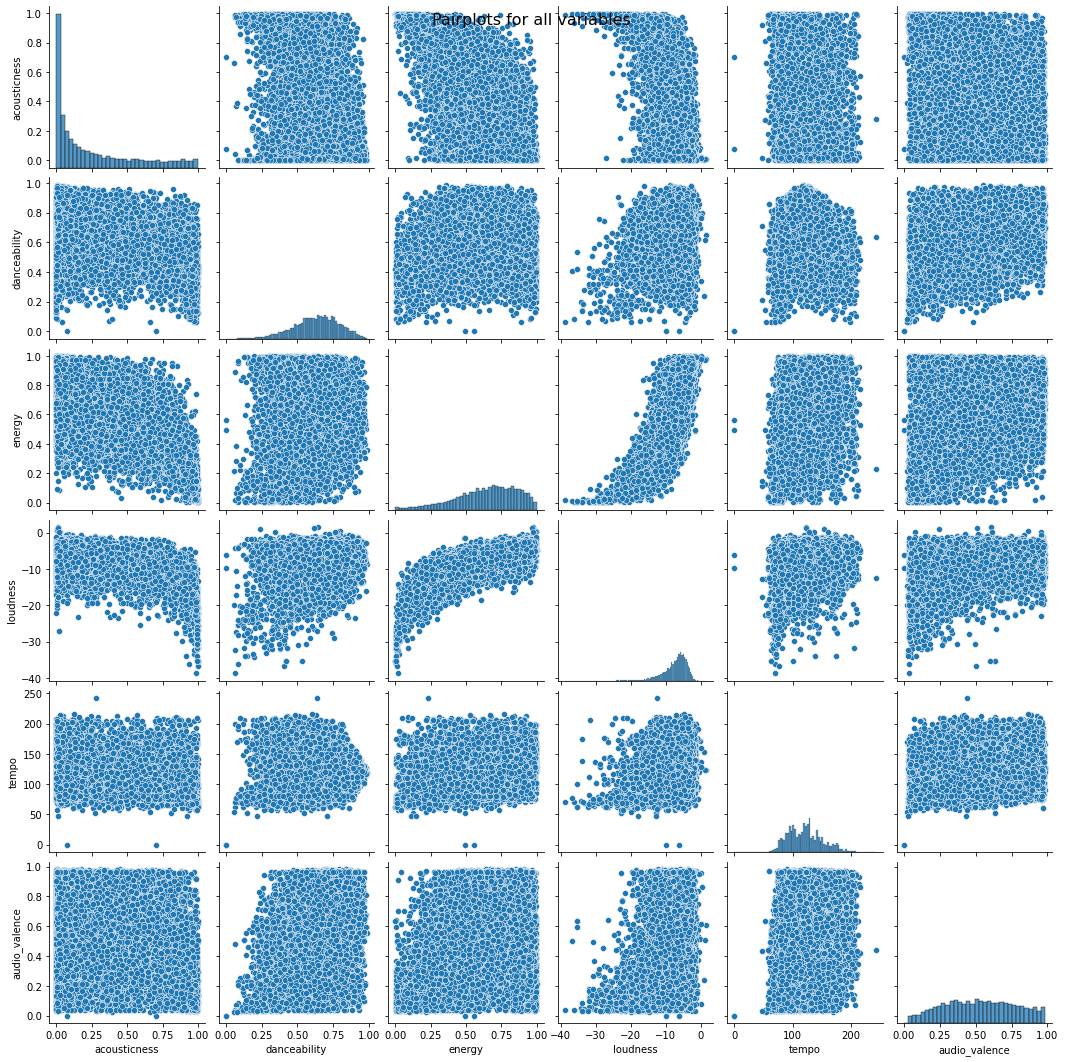

In [35]:
selection = ['acousticness', 'danceability', 'energy', 'loudness', 'tempo', 'audio_valence']
sns.pairplot(df[selection])
plt.suptitle('Pairplots for all variables', fontsize=16)
plt.show()

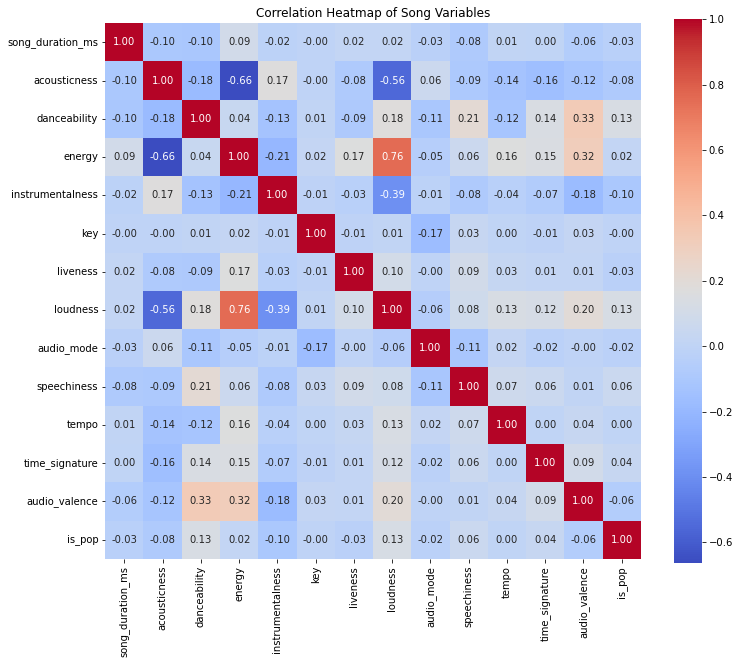

In [36]:
#correlation matrix
corr = df.corr()

#figure parameters
plt.figure(figsize=(12, 10))

#heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Song Variables')
plt.show()

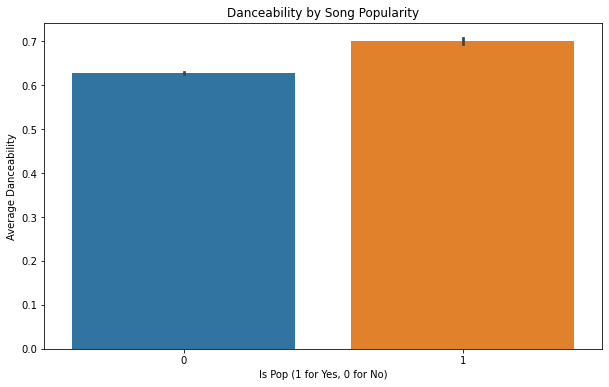

In [37]:
#since danceability seems to have the highest correlation to is_pop, lets do a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='is_pop', y='danceability', data=df)
plt.title('Danceability by Song Popularity')
plt.xlabel('Is Pop (1 for Yes, 0 for No)')
plt.ylabel('Average Danceability')
plt.show()

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  Now that you've done some exploration, write down your comments/observations here. What did you observe?

    
</div>

---

The amount of data points makes pairplots not very useful, though some of them still show some trends. The heatmap is much more effective, showing that 'danceability' has the highest positive correlation with 'is_pop'. This makes sense, since many pop songs are played in clubs for dancing.

---

# Prepare your dataset

Using your insight from above, and in preparation of your plan below, is there anything else you need to do to "prepare" your dataset? 

Before you code it up, comment below what you will do **and why**. That is, explain why you are doing something extra to the dataset! Use the tools/techniques and concepts we learned in class!


<br/>
<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: Right now, we only have a single dataset - we probably need to at least carve out a test set! 

</div>

<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: **Hint**: Do we need to do anything else to our features? Think about this!

</div>

<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: **Hint**: These are **not** the only thing I expect you to do here! I want you think about this! 
</div>

<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  Below, write down **your plan of action** - based on this EDA - what are you going to try? And Why?
    
</div>

---

First, we are going to drop the 'is_pop' and 'song_name' variables from our features. This is because 'is_pop' is our binary target variable and 'song_name' is a useless categorical variable that would not help us predict anything. We will also store just 'is_pop' in a separate object. Then we will do the train and test data split on those new objects. Given how many predictor variables we have, I believe we need to do dimensionality reduction, which we can do with a PCA. This would be most appropriate, as we can not just do feature selection since many features seem to have similar correlation with 'is_pop'. Next, I will check how many components we needed to achieve roughly 90% of original variance. No other data wrangling should be necessary, as other variables are continuous and do not have missing values.

---

In [38]:
features = df.drop(['is_pop', 'song_name'], axis=1)
target = df['is_pop']
#standartization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)



In [39]:
pca = PCA(n_components=0.9)  #keep 90% of variance
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Text(0, 0.5, 'Acucmulative variance')

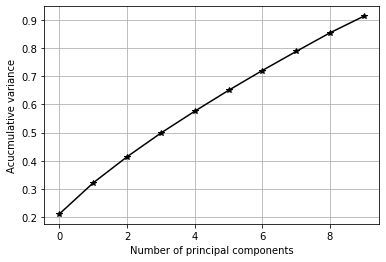

In [40]:
pca_ratio = pca.explained_variance_ratio_ 
#now let's check how much total variance is captured as K increases
#this is based on the value of k=30
plt.plot(np.cumsum(pca_ratio),'k*-')
plt.grid()
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance')

# ML Models

For each of your models below, **train** and **evaluate** them! 

For each, write **why** you are evaluating them in a certain way, and **how** you chose a particular value for a parameter, etc. 

<br/>
<div class='info'>
    
<font size='5'>🙋🏽‍♀️</font> **Tip**: You **are** allowed to use the scikit learn documentation [🔗 linked here](https://scikit-learn.org/stable/index.html)!
    
</div>

## Model 1 - Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#initialization
logistic_model = LogisticRegression()

#training
logistic_model.fit(X_train_pca, y_train)

#prediction
y_pred = logistic_model.predict(X_test_pca)

#accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

#confusion matrix
print(confusion_matrix(y_test, y_pred))

0.9126625962304221
[[3438    0]
 [ 329    0]]


I use accuracy scores and confusion matrices to evaluate every ML model I picked. This ensures that I can easily compare them to each other via the same metrics. They are the most comprehensive and basic evaluation parameters that should be enough for me to pick the best ML model. ROC and AUC curves would not work for every model here. Same with decision tree node plots.

## Model 2 - Support Vector Machine

In [43]:
from sklearn.svm import SVC

#initialization
svm_model = SVC(kernel='linear', C=1)
#hard_svm = SVC(kernel='linear', C=1e10)

#training
svm_model.fit(X_train_pca, y_train)
#hard_svm.fit(X_train_pca, y_train)

#prediction
y_pred_svm = svm_model.predict(X_test_pca)
#y_pred_hard = hard_svm.predict(X_test_pca)

#accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
#accuracy_hard = accuracy_score(y_test, y_pred_hard)

print(accuracy_svm)
#print(accuracy_hard)
#confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

0.9126625962304221
[[3438    0]
 [ 329    0]]


## ML Model 3 - Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

#initialization
decision_tree_model = DecisionTreeClassifier()

#training
decision_tree_model.fit(X_train_pca, y_train)

#prediction
y_pred_dt = decision_tree_model.predict(X_test_pca)

# accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(accuracy_dt)

#confusion matrix
print(confusion_matrix(y_test, y_pred_dt))

0.9564640297318822
[[3316  122]
 [  42  287]]


   ## ML Model 4 - K-Nearest Neighbors

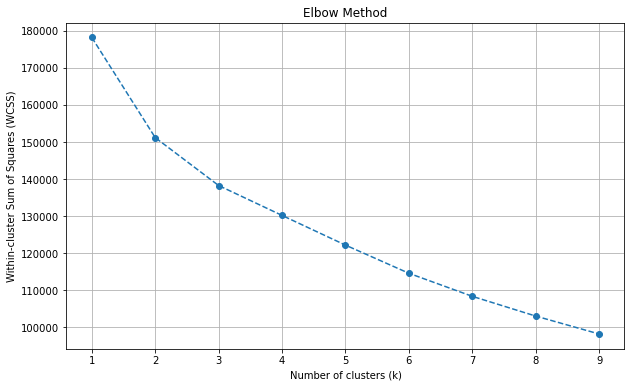

In [45]:
#Range of k to try
k_values = range(1, 10)       #1-9 range

#Storing the within-cluster sum of squares for each k  (WCSS)
wcss = []

#Calculating WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)  # this is the error

#Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
#initialization
knn_model = KNeighborsClassifier(n_neighbors=5)

#training
knn_model.fit(X_train_pca, y_train)

#prediction
y_pred_knn = knn_model.predict(X_test_pca)

#accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(accuracy_knn)

#confusion matrix
print(confusion_matrix(y_test, y_pred_knn))

0.9280594637642686
[[3296  142]
 [ 129  200]]


In [48]:
#initialization
knn_model7 = KNeighborsClassifier(n_neighbors=7)

#training
knn_model7.fit(X_train_pca, y_train)

#prediction
y_pred_knn7 = knn_model7.predict(X_test_pca)

#accuracy
accuracy_knn7 = accuracy_score(y_test, y_pred_knn7)

print(accuracy_knn7)

#confusion matrix
print(confusion_matrix(y_test, y_pred_knn7))

0.9243429784974782
[[3314  124]
 [ 161  168]]


In [49]:
#initialization
knn_model3 = KNeighborsClassifier(n_neighbors=3)

#training
knn_model3.fit(X_train_pca, y_train)

#prediction
y_pred_knn3 = knn_model3.predict(X_test_pca)

#accuracy
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)

print(accuracy_knn3)

#confusion matrix
print(confusion_matrix(y_test, y_pred_knn3))

0.94159808866472
[[3307  131]
 [  89  240]]


# Comparison/Evaluation/Comments

Here, write down your thoughts on the above 4 models.

* How did they perform individually? 
* How can we compare them?
* Which one did "best" and why do you think this?
* etc.

**Include any figures/plots in your explanation to help your explanation!**

<br/>
<div class='info'>
    
<font size='5'>🙋🏽‍♀️</font> **Hint**: A confusion matrix is probably a good start!
    
</div>

---

Overall, the decision tree model produced the highest accuracy of roughly 95.65%. However, it did result in 122 false positives. Both SVM and logistic regression models had accuracies around 91%, yet they had 0 false positives. They had way more false negatives though, meaning that those models are much pickier about their positives, letting only the most popular songs to be classified as 'is_pop'==1. The elbow method plot was not very informative for KNN, but the KNN model at 3 nearest neighbors had a high accuracy of 94.16% anda relatively low number of false positives and false negatives. We should the decision tree model if we only care about accuracy, but adjust our choices if minimixing False Positive or False Negatives is particularly important for our potential tasks.

---

I assesed the accuracy above.


---



<br/>
<div class='info'>
    
<font size='5'>🙋🏽‍♀️</font> **Pause-and-Ponder:**  If we were to train a NN on this dataset, how big should our input layer be? How big should your output layer be?
    
</div>

---

Our input layer should be 10 after the PCA, since we have 10 components/variables left. The output layer should be 1, since our target is a binary 1/0 variable, so it only requires one node.

---

In [57]:
n_input = X_train_pca.shape[1]
print(n_input)

10
